<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Yevhenii, my name is Dmitrii. Happy to review your project again! 🙌

As usual you can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Once again you achieved a very high level of the project! 
    
No critial issues/comments, however I want to return the project back to make sure that all my comments are clear. Also please let me know if you have questions or share additional information regarding your note about keeping/deleting months. 
    
If you have time you can check my yellow comments. If not you can send the same project, so I can accept it.
Come back soon! :)

</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 

Hi Yevhenii, thank you for leaving your comments/changes in the project :) 
As I mentioned no critial issues left, so your project has been accepted! 

Please keep up the great work and good luck in the next sprint! 🍀 
</div>

# Project description
We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.  

We have data for 2016 year. Now it’s December 2016 and we’re planning a campaign for 2017.

# Data description
- Name  
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)  

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Open the data files and study the general information

**Import all neсessary libraries.** Install sidetable. Use !pip install.

In [1]:
!python -m pip install sidetable

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from scipy import stats as st
from math import factorial
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
import sidetable
import heapq

Use try-except method to read csv file, because it should work both on my computer and jupiter hub. Assign the name `df_games` to the datasets and open it.

In [4]:
try:
    df_games = pd.read_csv('games.csv')
except:
    df_games = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you have project intro and all imports are grouped in different cells before the project. 

Good, that you use try/except to check data import. 
</div>

Look at the first 5 rows of data. Use the head() method.

In [5]:
df_games.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

We see some missing values in `critic_score`, `user_score` and `rating`.

Take a closer look at general information using the info() method. We can check how much columns it has, what data type of each column, how many non-null rows in each column.

In [6]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- The length of dataframe is 16715 rows.

- There are 16713 non-null values in `Name` column, so there are two games without name.

- There are also missing values in `Year_of_Release`, `Genre`, `Critic_score`, `User_Score` and `Rating` columns. We should analyze and process them later.

- We should also change column's names to lower string later for more convenient way typing them in the code. 

Take a closer look at numeric and categorical columns using the describe() method.

In [7]:
df_games.describe().T

count         mean        std     min     25%      50%  \
Year_of_Release  16446.0  2006.484616   5.877050  1980.0  2003.0  2007.00   
NA_sales         16715.0     0.263377   0.813604     0.0     0.0     0.08   
EU_sales         16715.0     0.145060   0.503339     0.0     0.0     0.02   
JP_sales         16715.0     0.077617   0.308853     0.0     0.0     0.00   
Other_sales      16715.0     0.047342   0.186731     0.0     0.0     0.01   
Critic_Score      8137.0    68.967679  13.938165    13.0    60.0    71.00   

                     75%      max  
Year_of_Release  2010.00  2016.00  
NA_sales            0.24    41.36  
EU_sales            0.11    28.96  
JP_sales            0.04    10.22  
Other_sales         0.03    10.57  
Critic_Score       79.00    98.00

- We have games released from 1980 to 2016, but more new games because medium year is 2007.

- We have minimum sales in every region - 0. We should check it later. It's a lot of '0' values. Probably it happend because a lot of platforms already don't exist and games for them don't release.

- Minimum critic score is 13 and maximum is 98 (from 100). Medium score is 71.

In [8]:
df_games.describe(include=['object']).T

count unique                          top  freq
Name        16713  11559  Need for Speed: Most Wanted    12
Platform    16715     31                          PS2  2161
Genre       16713     12                       Action  3369
User_Score  10014     96                          tbd  2424
Rating       9949      8                            E  3990

- There 11559 unique game's names from 16715 rows. We should check it for duplicates.

- From all over 16000 games the most games were on PS2 - 2161.

- The most frequent genre of games is action - 3369.

- The most frequent user score is `tbd` (to be determined) - 2424 games got it. Probably somebody who entered the data left this mark to determine these values later. In real case we should ask responsible for that and return it to fill in the table from the appropriate source. We'll convert this column from string to numeric later and replace `tbd` with null.

- The most frequent rating from ESRB is `E` - 3990 games got it.

Look at unique values in different columns to know what we dealing with.

In [9]:
df_games.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
df_games.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In `Genre` we have 2 missing values.

In [11]:
df_games.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In `Rating` we have a lot of missing values. We can't do something with it because of the column's data type - 'object'. We'll leave it as it is.

Describe the rating abbreviation to get more information from it. Later we will replace abbreviation with it's description. 
- 'EC' ('Early childhood'). Replace with '3+'.
- 'E' ('Everyone'). Replace with 'Everyone'.
- 'K-A' ('Kids to Adults') - the previous version of 'E'. So Replace with 'Everyone'.
- 'E10+' ('Everyone 10 and older'). Replace with '10+'.
- 'T' ('Teen'). Replace with '13+'.
- 'M' ('Mature'). Replace with '17+'.
- 'AO' ('Adults Only 18+'). Replace with '18+'.
- 'RP' ('Rating Pending'). It should probably be new games from 2016. Leave it as it is.

Check the dataframe for duplicate rows.

In [12]:
df_games.duplicated().sum()

0

There is no duplicates.

But check why we have only 11559 unique game's names from 16715. And why `Need for Speed: Most Wanted` appears 12 times.

In [13]:
df_games[df_games['Name'] == "Need for Speed: Most Wanted"].head()

Name Platform  Year_of_Release   Genre  NA_sales  \
253   Need for Speed: Most Wanted      PS2           2005.0  Racing      2.03   
523   Need for Speed: Most Wanted      PS3           2012.0  Racing      0.71   
1190  Need for Speed: Most Wanted     X360           2012.0  Racing      0.62   
1591  Need for Speed: Most Wanted     X360           2005.0  Racing      1.00   
1998  Need for Speed: Most Wanted       XB           2005.0  Racing      0.53   

      EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
253       1.79      0.08         0.47          82.0        9.1      T  
523       1.46      0.06         0.58           NaN        NaN    NaN  
1190      0.78      0.01         0.15          83.0        8.5      T  
1591      0.13      0.02         0.10          83.0        8.5      T  
1998      0.46      0.00         0.05          83.0        8.8      T

Now we see that this game was released in 2005 and 2012 and it was on differen platforms. So it's not duplicates.

Use the `freq()` method from the `sidetable` library to count number of games released on each platform and calculate it's share from the total number of games.

In [14]:
df_games.stb.freq(['Platform'], style=True, cum_cols=False)

The most popular platforms are PS2 with 12.93% of all games released, DS (12.87%), PS3 (7.96%), Wii (7.90%) and X360 (7.55%).

Look at 5 games with largest sales in NA. Use the `nlargest()` method.

In [15]:
df_games.nlargest(5, ['NA_sales'])

Name Platform  Year_of_Release     Genre  NA_sales  EU_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.58   
9          Duck Hunt      NES           1984.0   Shooter     26.93      0.63   
5             Tetris       GB           1989.0    Puzzle     23.20      2.26   
2     Mario Kart Wii      Wii           2008.0    Racing     15.68     12.76   

   JP_sales  Other_sales  Critic_Score User_Score Rating  
0      3.77         8.45          76.0          8      E  
1      6.81         0.77           NaN        NaN    NaN  
9      0.28         0.47           NaN        NaN    NaN  
5      4.22         0.58           NaN        NaN    NaN  
2      3.79         3.29          82.0        8.3      E

It's Wii Sports with 41.36 millions dollar on `Wii` platform, two games on `NES` platform with 29.08 and 26.93 millions sales. One on `GB` (23.2 millions) and one more on `Wii` (15.68 millions).

### Conclusion

We took the first look at the dataframes. We found out some unclear information in dataframe. But it needs some data preparation and preprocessing before analysis.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
It is also sometimes helpful to check not only the total amount of missing values in each column but also look at the percentage of missing values. It helps to understand the overall impact. You can check percentage using, for example, this code:

    games.isnull().sum()/len(df)

    Or you can even make a dataframe of of it using to_frame

    mis_values = df.isnull().sum().to_frame('missing_values')
    mis_values['%'] = round(df.isnull().sum()/len(df),3)
    mis_values.sort_values(by='%', ascending=False)
</div>

<div class="alert alert-info"> <b>Student comments:</b> Yes, I used the missing() function from the sidetable library in the processing missing values step below.</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Yes, that is  a great library choice.

## Data preprocessing

Let's replace the column names (make them lowercase). Create variable `columns_name` and assign to it the columns attribute df.columns for outputting column names. Use the method `str.lower()` to make them lowercase.

In [16]:
columns_name = df_games.columns.str.lower()
columns_name

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Correct. The most typical approach is to use snake case first_name. You can read about it here - https://levelup.gitconnected.com/case-styles-in-python-fd9591e57f86 

</div>

Set new column's names by calling the `set_axis()` method with arguments - list of new column's names, axis with the 'columns' value for changes in columns, 'inplace' with the value True for changes to the data structure.

In [17]:
df_games.set_axis(columns_name ,axis = 'columns',inplace = True)
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

### Data type replacement

For columns with low cardinality (the amount of unique values is lower than 50% of the count of these values) we can optymize datatype.
First, check what categorical columns have the amount of unique values is lower than 50% of the count of these values. It's `genre` and `rating`.

In [18]:
df_games['genre'] = df_games['genre'].astype('category')

Let's change data type of column 'year_of_release' from float to integer. Because of the missing values in this column pandas can't be sure that the missing values isn't a decimal numbers, it automatically converts the column's data type to float64. So, apply the astype() method to this column with argument 'Int16'.

In [19]:
df_games = df_games.astype({'year_of_release': 'Int16'})

Convert `user_score` column from string to numeric. Use the `pd.to_numeric()` method. Set `errors='coerce'` to convert `tbd` from string to `NaN` (null value).

In [20]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int16   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   object  
dtypes: Int16(1), category(1), float64(6), object(3)
memory usage: 1.2+ MB


Check the result.

In [21]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     28.96      3.77         8.45          76.0         8.0      E  
1      3.58      6.81         0.77           NaN         NaN    NaN  
2     12.76      3.79         3.29          82.0         8.3      E  
3     10.93      3.28         2.95          80.0         8.0      E  
4      8.89     10.22         1.00           NaN         NaN    NaN

#### Conclusion

We changed column's `year_of_release` data types to get more convenient look of years. Changed other column's data type in order to reduce memory usage by twice.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Great that you checked data types. Could be also good to convert critic_score and user_score to int values.

<div class="alert alert-info"> <b>Student comments:</b> I think that we have float values in user_score and when we'll fill in missing values there will be some float values too.</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>

So, it is mainly important to reduce size of the dataset and making data output more clean.

For critic_score, we already have int number from 0 to 100. 
For user score it is indeed more tricky, but it could be either converted to 0/100 range and then to int.

### Processing missing values

We should check percentage of missing values in every column. For that use `sidetable` library and `stb.missing()`. Set style=True to get percentages with % sign and rounded to second decimal.

In [22]:
df_games.stb.missing(style=True)

In [23]:
df_games[df_games['user_score'].isnull()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
1      29.08      3.58      6.81         0.77           NaN         NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN         NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN         NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN         NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN         NaN    NaN

It's 51.32% missing values in `critic_score`, 40.48% in `user_score` and 40.09% in `rating` columns. We should analyze carefully before dealing with them. Check what the reason might be that we have missing values. Maybe data is missing from previous years (before 2000).

#### `name` and `genre`

First, let's deal with `name` and `genre` columns.

In [24]:
df_games[df_games['name'].isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating  
659           0.08           NaN         NaN    NaN  
14244         0.00           NaN         NaN    NaN

We see that missing values from columns `name` and `genre` in the same rows. Check how many games were released on the platform 'GEN'. Use the `query()` method.

In [25]:
df_games.query('platform =="GEN"').count()

name               27
platform           29
year_of_release    29
genre              27
na_sales           29
eu_sales           29
jp_sales           29
other_sales        29
critic_score        0
user_score          0
rating              0
dtype: int64

It's only 29 games, check what genres of these games and what year of release.

In [26]:
df_games.query('platform =="GEN"').groupby(['genre', 'year_of_release'])['platform'].count()

genre         year_of_release
Action        1990               1
              1991               0
              1992               0
              1993               2
              1994               0
Adventure     1990               0
              1991               0
              1992               1
              1993               1
              1994               0
Fighting      1990               0
              1991               0
              1992               2
              1993               1
              1994               2
Misc          1990               0
              1991               0
              1992               0
              1993               0
              1994               1
Platform      1990               0
              1991               1
              1992               1
              1993               1
              1994               4
Puzzle        1990               0
              1991               0
              1992       

Games released from 1990 to 1994 for 'GEN' platform and were in different genres. We think that this information less relevant for us and it's only 2 missing values we can drop them. It won't affect on our analysis.

<div class="alert alert-info"> <b>Student comments:</b> 

In [27]:
df_games['genre'].dropna(inplace=True)
df_games['name'].dropna(inplace=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int16   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   object  
dtypes: Int16(1), category(1), float64(6), object(3)
memory usage: 1.2+ MB


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Here indeed we have a very small proportion of missing data (<2%) it can be easier just to delete it.


#### `year_of_release`

Check what platforms have the most missing values in `year_of_release`. For that find all missing values for this column by using the `isnull()` method. Use the `groupby()` method to group by `platform` and the `count()` method to count missing values for each platform. Sort the result in descending order and take first 5 rows.

In [28]:
df_games[df_games['year_of_release'].isnull()].groupby(
    'platform')['name'].count().sort_values(ascending=False).head()

platform
PS2     34
Wii     34
DS      30
X360    30
PS3     25
Name: name, dtype: int64

It's 34 games that don't have year of release on `PS2` and `Wii`.

Look in which years were released games on `PS2`. Group by `year_of_release` and count.

In [29]:
df_games.query('platform == "PS2"')[['year_of_release', 'name']].groupby(
    'year_of_release').count().reset_index()

year_of_release  name
0              2000    82
1              2001   185
2              2002   280
3              2003   256
4              2004   259
5              2005   260
6              2006   259
7              2007   214
8              2008   191
9              2009    96
10             2010    38
11             2011     7

It's from 2000 to 2011 for `PS2`.

In [30]:
df_games.query('platform == "Wii"')[['year_of_release', 'name']].groupby(
    'year_of_release').count().reset_index()

year_of_release  name
0              2006    44
1              2007   185
2              2008   282
3              2009   325
4              2010   253
5              2011   143
6              2012    31
7              2013    12
8              2014     6
9              2015     4
10             2016     1

And from 2006 to 2016 for `Wii`.

The most games on `PS2` were released between 2002 and 2008, on `Wii` - between 2007 and 2011. So data is missing for newest platfrom as much as for old. Probably the data was missing by mistake while typing or some technical error.

Group by `platform` and calculate the mean `year_of_release` for each platform. Round values to the full year.

In [31]:
mean_year_for_platform = pd.DataFrame(
    round(df_games.groupby('platform')['year_of_release'].mean()))
mean_year_for_platform.head()

year_of_release
platform                 
2600               1982.0
3DO                1995.0
3DS                2013.0
DC                 2000.0
DS                 2008.0

In [32]:
mean_year_for_platform.query('platform =="PS2"')

year_of_release
platform                 
PS2                2005.0

We calculated the mean `year_of_release` for each platform. For games on `PS2` it's 2005.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Replacing the missing year with a median value, unfortunately, would be not correct. It is possible to check third-party sources to extract it by name or at least check the mean value per platform.
    
However, as here we again have a very small proportion of missing data (<2%) it can be easier just to delete it.


<div class="alert alert-info"> <b>Student comments:</b> Check some missing values in `year_of_release`</div>

In [33]:
df_games[df_games['year_of_release'].isnull()].head()

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2             <NA>    Sports      4.26   
377            FIFA Soccer 2004      PS2             <NA>    Sports      0.59   
456  LEGO Batman: The Videogame      Wii             <NA>    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2             <NA>  Fighting      1.57   
609              Space Invaders     2600             <NA>   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score  user_score rating  
183      0.26      0.01         0.71          94.0         8.5      E  
377      2.36      0.04         0.51          84.0         6.4      E  
456      0.97      0.00         0.29          74.0         7.9   E10+  
475      1.02      0.00         0.41           NaN         NaN    NaN  
609      0.14      0.00         0.03           NaN         NaN    NaN

<div class="alert alert-info"> <b>Student comments:</b> We see that 'Madden NFL 2004' and 'FIFA Soccer 2004' released on `PS2` and it will fill it in with 2005. It can be not correct. We could fill in with year extracted from name. But not every game has year in it's name. So we decided that it would be easier get rid from these missing values. It's only 269 and it less than 2% of data. </div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>

I totally agree with your conclusions. 

In [34]:
df_games['year_of_release'].dropna(inplace=True)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  Int16   
 3   genre            16713 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   object  
dtypes: Int16(1), category(1), float64(6), object(3)
memory usage: 1.2+ MB


#### `critic_score`

Check what years have the most missing values in `critic_score`. For that find all missing values for this column by using the `isnull()` method. Use the `groupby()` method to group by `year_of_release` and the `count()` method to count missing values for each year. Sort the result in descending order and take first 5 rows.

In [35]:
df_games[df_games['critic_score'].isnull()].groupby(
    'year_of_release')['name'].count().sort_values(ascending=False).head()

year_of_release
2009    775
2010    755
2008    712
2011    636
2007    505
Name: name, dtype: int64

Check what platforms have the most missing values in `critic_score`.

In [36]:
df_games[df_games['critic_score'].isnull()].groupby(
    'platform')['name'].count().sort_values(ascending=False).head()

platform
DS     1434
PS      997
PS2     863
PSP     747
Wii     735
Name: name, dtype: int64

The most missing values in `critic_score` column in games released in 2009 year. Check how many games were released in 2009 at all.

In [37]:
df_games[df_games['year_of_release'] == 2009]['name'].count()

1426

<div class="alert alert-info"> <b>Student comments:</b> </div>

So it were 775 missing `critic_score`'s from 1426 in 2009. Our suggestion about missing values in old games because there wasn't such scoring in 1990 was wrong. It can be true but not only that reason affects on that fact that we have missing values here. Probably the data wasn't collected properly or was missed somewhere in the middle of the process of collection. In real case we should talk with technical department or check the source the data was collected from. But now we can't drop them because we'll lose big amount of data. So, leave it as it is.

<div class="alert alert-info"> <b>Student comments:</b> We think that if we replace `critic_score with some numeric value we'll get wrong correlation in the step where we need to find correlation between reviews and total sales. So it's better to fill in with some mean values, because it will be closer to real values and also in the range of real critic scores between 13 and 98.</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>

True, -5 will be indeed not the best example here. 
The last option is just to keep nan values as float to be able to perform operations and not distort data. 

    games[games['critic_score'] == 'tbd'] = float('nan')

Calculate mean `critic_score` for all the games in our dataframe. Use the `mean()` method.

In [38]:
df_games['critic_score'].median()

71.0

Let's try to fill in the `critic_score` column by medians for some categories. Now, in order to fill in missing values in `critic_score` column, lets find median `critic_score` value grouping by `platform` and `genre` columns. Use the `median()` and the `groupby()` methods.

In [39]:
median_critic_score = df_games.groupby(['platform', 'genre'])['critic_score'].median().reset_index()
median_critic_score.query('platform == "PS2"')

platform         genre  critic_score
192      PS2        Action          67.0
193      PS2     Adventure          63.0
194      PS2      Fighting          72.0
195      PS2          Misc          71.0
196      PS2      Platform          66.0
197      PS2        Puzzle          75.0
198      PS2        Racing          68.0
199      PS2  Role-Playing          72.5
200      PS2       Shooter          68.0
201      PS2    Simulation          73.0
202      PS2        Sports          74.0
203      PS2      Strategy          70.0

In [40]:
median_critic_score.query('platform == "Wii"')

platform         genre  critic_score
312      Wii        Action          62.0
313      Wii     Adventure          65.0
314      Wii      Fighting          71.5
315      Wii          Misc          64.0
316      Wii      Platform          68.0
317      Wii        Puzzle          65.0
318      Wii        Racing          54.0
319      Wii  Role-Playing          71.0
320      Wii       Shooter          69.0
321      Wii    Simulation          65.0
322      Wii        Sports          66.0
323      Wii      Strategy          68.0

Now we need to fill in all missing values in `critic_score` according to the medians above. Use the `fillna()` method and the `transform()`.

In [41]:
df_games['critic_score_full'] = df_games['critic_score'].fillna(
    df_games.groupby(['platform', 'genre'])['critic_score'].transform('mean'))

Check the result of filling in.

In [42]:
df_games[df_games['critic_score'].isnull()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1      29.08      3.58      6.81         0.77           NaN         NaN   
4      11.27      8.89     10.22         1.00           NaN         NaN   
5      23.20      2.26      4.22         0.58           NaN         NaN   
9      26.93      0.63      0.28         0.47           NaN         NaN   
10      9.05     10.95      1.93         2.74           NaN         NaN   

   rating  critic_score_full  
1     NaN                NaN  
4     NaN                NaN  
5     NaN                NaN  
9     NaN                NaN  
10    NaN          62.037037

Check if there are still missing values in `critic_score`. Use the `info()` method.

In [43]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               16713 non-null  object  
 1   platform           16715 non-null  object  
 2   year_of_release    16446 non-null  Int16   
 3   genre              16713 non-null  category
 4   na_sales           16715 non-null  float64 
 5   eu_sales           16715 non-null  float64 
 6   jp_sales           16715 non-null  float64 
 7   other_sales        16715 non-null  float64 
 8   critic_score       8137 non-null   float64 
 9   user_score         7590 non-null   float64 
 10  rating             9949 non-null   object  
 11  critic_score_full  15581 non-null  float64 
dtypes: Int16(1), category(1), float64(7), object(3)
memory usage: 1.3+ MB


We filled in almost a half of missing values in `critic_score`. But it's still almost 5000 missing values. Check what years left.

In [44]:
df_games[df_games['critic_score_full'].isnull()].groupby(
    'year_of_release')['name'].count().sort_values(ascending=False).head()

year_of_release
1995    118
1999    117
1998    117
1994     98
1997     95
Name: name, dtype: int64

It's still a lot. Try to find median `critic_score` value grouping by `platform` column only. Use the median() and the groupby() methods.

In [45]:
median_critic_score_for_platform = df_games.groupby(
    'platform')['critic_score'].median().reset_index()
median_critic_score_for_platform.head()

platform  critic_score
0     2600           NaN
1      3DO           NaN
2      3DS          68.0
3       DC          88.0
4       DS          66.0

Now we need to fill in all missing values in `critic_score` according to the medians above. Use the `fillna()` method and the `transform()`.

In [46]:
df_games['critic_score_full_2'] = df_games['critic_score'].fillna(
    df_games.groupby('platform')['critic_score'].transform('median'))

Check the result of filling in.

In [47]:
df_games[df_games['critic_score'].isnull()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1      29.08      3.58      6.81         0.77           NaN         NaN   
4      11.27      8.89     10.22         1.00           NaN         NaN   
5      23.20      2.26      4.22         0.58           NaN         NaN   
9      26.93      0.63      0.28         0.47           NaN         NaN   
10      9.05     10.95      1.93         2.74           NaN         NaN   

   rating  critic_score_full  critic_score_full_2  
1     NaN                NaN                  NaN  
4     NaN                NaN                  NaN  
5     NaN                NaN                  NaN  
9     NaN                NaN                  NaN  
10    NaN          62.037037                 66.0

Check how if there are still missing values in `critic_score`. Use the `info()` method.

In [48]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 16713 non-null  object  
 1   platform             16715 non-null  object  
 2   year_of_release      16446 non-null  Int16   
 3   genre                16713 non-null  category
 4   na_sales             16715 non-null  float64 
 5   eu_sales             16715 non-null  float64 
 6   jp_sales             16715 non-null  float64 
 7   other_sales          16715 non-null  float64 
 8   critic_score         8137 non-null   float64 
 9   user_score           7590 non-null   float64 
 10  rating               9949 non-null   object  
 11  critic_score_full    15581 non-null  float64 
 12  critic_score_full_2  15595 non-null  float64 
dtypes: Int16(1), category(1), float64(8), object(3)
memory usage: 1.5+ MB


We filled in almost every missing values in `critic_score`. But it's still over 1000 missing values. Check for what `year_of_release` left missing values.

In [49]:
df_games[df_games['critic_score_full_2'].isnull()].groupby(
    'year_of_release')['platform'].count().sort_values(ascending=False).head(25)

year_of_release
1995    118
1999    117
1998    116
1994     98
1997     95
1996     95
2000     79
1993     62
1981     46
1991     41
1992     38
1982     36
2001     21
1986     21
1989     17
1983     17
1987     16
1990     16
1988     14
1984     14
1985     12
1980      9
2002      1
Name: platform, dtype: int64

We have missing values of `critic_score` before the 2002 year.

Try to find median `critic_score` value grouping by `genre` column only. 

Use the `fillna()` method and the `transform()`.

In [50]:
df_games['critic_score_full_3'] = df_games['critic_score'].fillna(
    df_games.groupby('genre')['critic_score'].transform('median'))

Check the result of filling in.

In [51]:
df_games[df_games['critic_score'].isnull()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
1      29.08      3.58      6.81         0.77           NaN         NaN   
4      11.27      8.89     10.22         1.00           NaN         NaN   
5      23.20      2.26      4.22         0.58           NaN         NaN   
9      26.93      0.63      0.28         0.47           NaN         NaN   
10      9.05     10.95      1.93         2.74           NaN         NaN   

   rating  critic_score_full  critic_score_full_2  critic_score_full_3  
1     NaN                NaN                  NaN                 69.0  
4     NaN                NaN                  NaN                 74.0  
5     NaN                NaN                  NaN                 70.0  
9     NaN                NaN                  NaN                 73.0  
10    NaN          62.037037                 66.0                 70.0

Check how if there are still missing values in `critic_score`. Use the `info()` method.

In [52]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 16713 non-null  object  
 1   platform             16715 non-null  object  
 2   year_of_release      16446 non-null  Int16   
 3   genre                16713 non-null  category
 4   na_sales             16715 non-null  float64 
 5   eu_sales             16715 non-null  float64 
 6   jp_sales             16715 non-null  float64 
 7   other_sales          16715 non-null  float64 
 8   critic_score         8137 non-null   float64 
 9   user_score           7590 non-null   float64 
 10  rating               9949 non-null   object  
 11  critic_score_full    15581 non-null  float64 
 12  critic_score_full_2  15595 non-null  float64 
 13  critic_score_full_3  16713 non-null  float64 
dtypes: Int16(1), category(1), float64(9), object(3)
memory usage: 1.6+ MB


Compare the median and the mean of `critic_score`, `critic_score_full`, `critic_score_full_2`, `critic_score_full_3`. Check if we didn't change their values. Use the `describe()` method.

In [53]:
df_games.describe().T

count         mean        std     min     25%  \
year_of_release      16446.0  2006.484616   5.877050  1980.0  2003.0   
na_sales             16715.0     0.263377   0.813604     0.0     0.0   
eu_sales             16715.0     0.145060   0.503339     0.0     0.0   
jp_sales             16715.0     0.077617   0.308853     0.0     0.0   
other_sales          16715.0     0.047342   0.186731     0.0     0.0   
critic_score          8137.0    68.967679  13.938165    13.0    60.0   
user_score            7590.0     7.125046   1.500006     0.0     6.4   
critic_score_full    15581.0    68.244875  10.750225    13.0    63.0   
critic_score_full_2  15595.0    69.315614  10.378205    13.0    66.0   
critic_score_full_3  16713.0    69.675163   9.969003    13.0    67.0   

                             50%      75%      max  
year_of_release      2007.000000  2010.00  2016.00  
na_sales                0.080000     0.24    41.36  
eu_sales                0.020000     0.11    28.96  
jp_sales                0.000000     0.04    10.22  
other_sales             0.010000     0.03    10.57  
critic_score           71.000000    79.00    98.00  
user_score              7.500000     8.20     9.70  
critic_score_full      68.020833    74.00    98.00  
critic_score_full_2    70.000000    73.50    98.00  
critic_score_full_3    70.000000    75.00    98.00

It was median= 71 before filling in missing values and 70 after filling in by `genre`. We filled in all missing values.

But take a look at distributions.

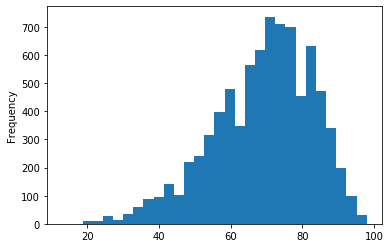

In [54]:
df_games['critic_score'].plot(kind='hist', bins=30)

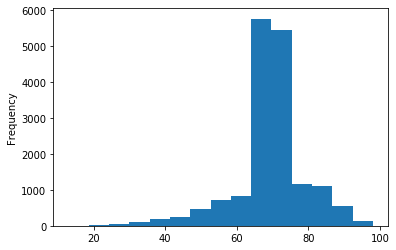

In [55]:
df_games['critic_score_full_3'].plot(kind='hist', bins=15)

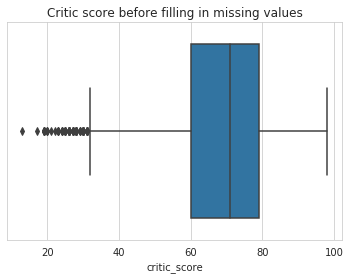

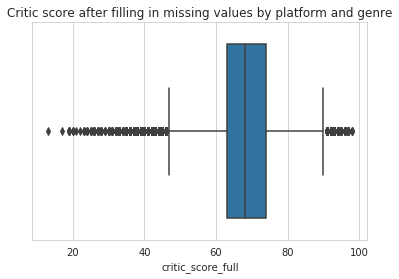

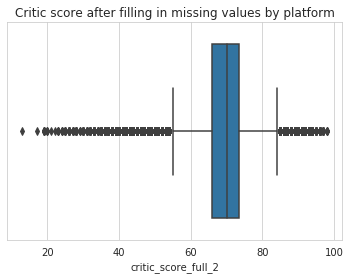

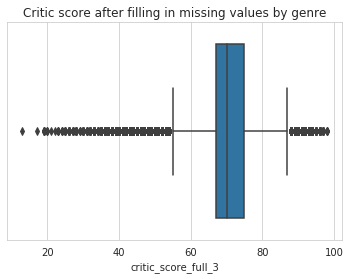

In [56]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    
    fig, axes = plt.subplots()
   
    sns.boxplot(
        data=df_games, x='critic_score'
    ).set_title('Critic score before filling in missing values')
    plt.show()
    sns.boxplot(
        data=df_games, x='critic_score_full'
    ).set_title('Critic score after filling in missing values by platform and genre')
    plt.show()
    sns.boxplot(
        data=df_games, x='critic_score_full_2'
    ).set_title('Critic score after filling in missing values by platform')
    plt.show()
    sns.boxplot(
        data=df_games, x='critic_score_full_3'
    ).set_title('Critic score after filling in missing values by genre')
    plt.show()

Now it's much more `critic_score`'s lie between 65 to 75. And some rare values bigger than 85 and less then 55 are an outliers.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Here we can just replace missing values just with some constant numerical value (e.g. -5 to be able to use this data in any operations), as .mean() can lead to some incorect interpretation of data (for example if critic score is much lower on a specific platform like Cyberpunk on PS4).
    
    games['critic_score'] = games['critic_score'].replace(np.NaN, -5)
    games['critic_score'] = games['critic_score'].astype('float')

</div>


#### `user_score`

Check in what years we don't have `user_score`. Group by `year_of_release` and count `user_score`.

In [57]:
df_games.groupby('year_of_release')['user_score'].count()

year_of_release
1980      0
1981      0
1982      0
1983      0
1984      0
1985      1
1986      0
1987      0
1988      1
1989      0
1990      0
1991      0
1992      1
1993      0
1994      1
1995      0
1996      8
1997     18
1998     31
1999     31
2000    107
2001    257
2002    464
2003    516
2004    489
2005    583
2006    552
2007    629
2008    661
2009    614
2010    467
2011    501
2012    339
2013    304
2014    329
2015    297
2016    262
Name: user_score, dtype: int64

We almost don't have `user_score` for games released before 1996.

Calculate the median values of `user_score` for `critic_score_full_3`. Use the `groupby()` method.

In [58]:
median_score = df_games.groupby('critic_score_full_3')['user_score'].median()
median_score.head()

critic_score_full_3
13.0    1.00
17.0    1.70
19.0    2.95
20.0    1.90
21.0    5.00
Name: user_score, dtype: float64

In [59]:
median_score.tail()

critic_score_full_3
94.0    8.5
95.0    8.6
96.0    8.9
97.0    8.3
98.0    7.8
Name: user_score, dtype: float64

We see some dependency - if critic score is high, user score is high too. If critic score is low, user score is low.

Fill in missing values with mean values of `user_score` for every `critic_score_full_3` from the dataframe `df` (without `tbd`).

In [60]:
df_games['user_score_full'] = df_games['user_score'].fillna(df_games.groupby([
    'critic_score_full_3'])['user_score'].transform('median'))
df_games['user_score_full'] = round(df_games['user_score_full'], 1)
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN    NaN   

   critic_score_full  critic_score_full_2  critic_score_full_3  \
0               76.0                 76.0                 76.0   
1                NaN                  NaN                 69.0   
2               82.0                 82.0                 82.0   
3               80.0                 80.0                 80.0   
4                NaN                  NaN                 74.0   

   user_score_full  
0              8.0  
1              7.2  
2              8.3  
3              8.0  
4              7.7

Check the result.

In [61]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   name                 16713 non-null  object  
 1   platform             16715 non-null  object  
 2   year_of_release      16446 non-null  Int16   
 3   genre                16713 non-null  category
 4   na_sales             16715 non-null  float64 
 5   eu_sales             16715 non-null  float64 
 6   jp_sales             16715 non-null  float64 
 7   other_sales          16715 non-null  float64 
 8   critic_score         8137 non-null   float64 
 9   user_score           7590 non-null   float64 
 10  rating               9949 non-null   object  
 11  critic_score_full    15581 non-null  float64 
 12  critic_score_full_2  15595 non-null  float64 
 13  critic_score_full_3  16713 non-null  float64 
 14  user_score_full      16713 non-null  float64 
dtypes: Int16(1), catego

We have our `user_score` filled in.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>

Here once again it is also possibe to replace it with some constant numerical value, as "tbd" value can cause issues with calculations or graphs creation.

    games['user_score'] = games['user_score'].replace(np.NaN, -5)

</div>


#### Conclusion

We left `rating`, `critic_score` and `user_score` as it is and dropped missing values in `year_of_release`.

### Replacing abbreviation of rating with it's description

Replace abbreviation with it's description. 
- 'EC' ('Early childhood'). Replace with '3+'.
- 'E' ('Everyone'). Replace with 'Everyone'.
- 'K-A' ('Kids to Adults') - the previous version of 'E'. So Replace with 'Everyone'.
- 'E10+' ('Everyone 10 and older'). Replace with '10+'.
- 'T' ('Teen'). Replace with '13+'.
- 'M' ('Mature'). Replace with '17+'.
- 'AO' ('Adults Only 18+'). Replace with '18+'.
- 'RP' ('Rating Pending'). It should probably be new games from 2016. Replace these cells with 'unknown'.

In [62]:
len(df_games.query('rating == "RP"'))

3

It's only 3 games with `RP` value.

Use `np.where()` to replace values in `df_games.rating` column.

In [63]:
df_games['rating'] = np.where(df_games.rating == 'EC', '3+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'E', 'everyone', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'K-A', 'everyone', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'E10+', '10+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'T', '13+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'M', '17+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'AO', '18+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'RP', 'unknown', df_games.rating)
df_games['rating'] = np.where(df_games.rating.isnull(), 'unknown', df_games.rating)

Check the result using the `unique()` method.

In [64]:
df_games['rating'].unique()

array(['everyone', 'unknown', '17+', '13+', '10+', '18+', '3+'],
      dtype=object)

#### Conclusion

Everything worked properly. Replaced rating to more clear understanding it's meanings. 

### Calculate the total sales  
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [65]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0     28.96      3.77         8.45          76.0         8.0  everyone   
1      3.58      6.81         0.77           NaN         NaN   unknown   
2     12.76      3.79         3.29          82.0         8.3  everyone   
3     10.93      3.28         2.95          80.0         8.0  everyone   
4      8.89     10.22         1.00           NaN         NaN   unknown   

   critic_score_full  critic_score_full_2  critic_score_full_3  \
0               76.0                 76.0                 76.0   
1                NaN                  NaN                 69.0   
2               82.0                 82.0                 82.0   
3               80.0                 80.0                 80.0   
4                NaN                  NaN                 74.0   

   user_score_full  
0              8.0  
1              7.2  
2              8.3  
3              8.0  
4              7.7

Set variables the new column `total_sales` and put there result of summing up of each row of columns `na_sales`, `eu_sales`, `jp_sales`, `other_sales`. Use the `sum()` method

In [66]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Check the first 5 rows.

In [67]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0     28.96      3.77         8.45          76.0         8.0  everyone   
1      3.58      6.81         0.77           NaN         NaN   unknown   
2     12.76      3.79         3.29          82.0         8.3  everyone   
3     10.93      3.28         2.95          80.0         8.0  everyone   
4      8.89     10.22         1.00           NaN         NaN   unknown   

   critic_score_full  critic_score_full_2  critic_score_full_3  \
0               76.0                 76.0                 76.0   
1                NaN                  NaN                 69.0   
2               82.0                 82.0                 82.0   
3               80.0                 80.0                 80.0   
4                NaN                  NaN                 74.0   

   user_score_full  total_sales  
0              8.0        82.54  
1              7.2        40.24  
2              8.3        35.52  
3              8.0        32.77  
4              7.7        31.38

Look at 5 games with largest total sales. Use the `nlargest()` method.

In [68]:
df_games.nlargest(5, ['total_sales'])

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0     28.96      3.77         8.45          76.0         8.0  everyone   
1      3.58      6.81         0.77           NaN         NaN   unknown   
2     12.76      3.79         3.29          82.0         8.3  everyone   
3     10.93      3.28         2.95          80.0         8.0  everyone   
4      8.89     10.22         1.00           NaN         NaN   unknown   

   critic_score_full  critic_score_full_2  critic_score_full_3  \
0               76.0                 76.0                 76.0   
1                NaN                  NaN                 69.0   
2               82.0                 82.0                 82.0   
3               80.0                 80.0                 80.0   
4                NaN                  NaN                 74.0   

   user_score_full  total_sales  
0              8.0        82.54  
1              7.2        40.24  
2              8.3        35.52  
3              8.0        32.77  
4              7.7        31.38

It's almost the same games which got the most sales in North America (`na_sales`). Only Wii Sports Resort and Pokemon Red/Pokemon Blue weren't first in NA but they've got big sales in Europe and Japan.

#### Conclusion

Calculated total sales for every game. In the first 5 games by sales - 3 were released on the `Wii` platform in the first years of it's existence.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great, everything is correct here and data is ready to be analyzed.

## Analyze the data

### Distribution of the number of games by years

- **Look at how many games were released in different years. Check if the data for every period significant.**

Sort values by `year_of_release` to see how number of games changed YoY.

In [69]:
distr_by_year = df_games[['year_of_release', 'name']].groupby(
    'year_of_release').count().sort_values(by='year_of_release').reset_index()
distr_by_year

year_of_release  name
0              1980     9
1              1981    46
2              1982    36
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    60
14             1994   121
15             1995   219
16             1996   263
17             1997   289
18             1998   379
19             1999   338
20             2000   350
21             2001   482
22             2002   829
23             2003   775
24             2004   762
25             2005   939
26             2006  1006
27             2007  1197
28             2008  1427
29             2009  1426
30             2010  1255
31             2011  1136
32             2012   653
33             2013   544
34             2014   581
35             2015   606
36             2016   502

Look at general information of `distr_by_year`. Use the `info()` method.

In [70]:
distr_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   year_of_release  37 non-null     int64
 1   name             37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


Plot The lollipop graph to build distribution of the number of games YoY. For that build vertical lines (`vlines`) where on the axis x will be `distr_by_year['year_of_release']` and set `ymin=0`  and `ymax = distr_by_year['name']`. Build dots plotting `scatter` with coordinates `x = distr_by_year['year_of_release']` and `y = distr_by_year['name']` (the value that in the column `name` accord to each year. Set title, ylabel and annotation to dots (use `ax.text()` with coordinates row[1] - year and row[2]+30 - the values from the column `name` shifted up by 30.

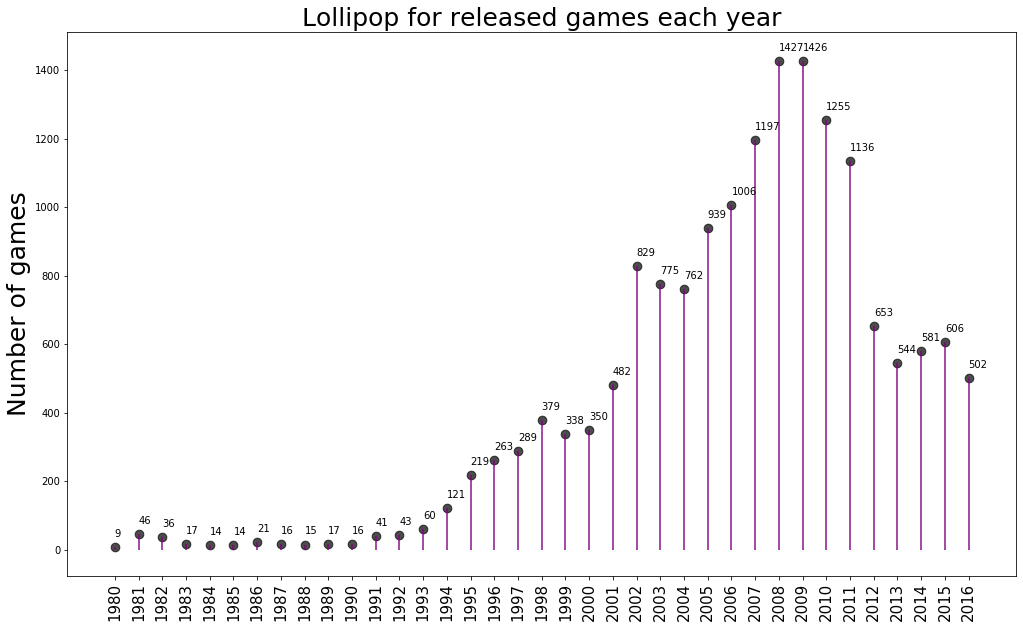

In [71]:
fig, ax = plt.subplots(figsize=(17,10))

ax.vlines(x = distr_by_year['year_of_release'], ymin = 0, 
          ymax = distr_by_year['name'], color='purple', alpha = 0.7, linewidth = 2)

ax.scatter(x = distr_by_year['year_of_release'], y = distr_by_year['name'],
           s=75, color='black', alpha=0.7)

ax.set_title("Lollipop for released games each year", fontdict={'size':25})
ax.set_ylabel("Number of games", fontdict={'size':25})
ax.set_xticks(distr_by_year['year_of_release'])
ax.set_xticklabels(distr_by_year['year_of_release'], rotation=90, fontdict={'size':15})

for row in distr_by_year.itertuples():
    ax.text(row[1], row[2]+30, s = round(row[2], 2))

#### Conclusion

We see an increase in the number of games released each year from the 1994 (from 60 in previous years to 121 in 1994), accelerated in growth after 2002 (829 new games) and reached its peak in 2008-2009 (1427 - 1426 new games released per year). Last years it fell to 502 new games. It might be because a lot of people still play their favorite games series from previous years and companies only remaster these games or release new  one from series. And a lot of games 'fade in the history'. It were years with a lot of games studios and now it's probably a few big monopolistic studios.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Yes, looks like there were almost no games before 1994.

</div>

### Total sales for different platforms

- **Look at how sales varied from platform to platform.**

For that let's take only two rows - `platform` and `total_sales` and group by `platform` and sum `total_sales`. Sort by `total_sales` in ascending order and reset index. Set the result to a variable `sales_by_platform`.

In [72]:
sales_by_platform = df_games[['platform', 'total_sales']].groupby(
    'platform').sum().sort_values(by='total_sales').reset_index()
sales_by_platform

platform  total_sales
0      PCFX         0.03
1        GG         0.04
2       3DO         0.10
3      TG16         0.16
4        WS         1.42
5        NG         1.44
6       SCD         1.86
7        DC        15.95
8       GEN        30.77
9       SAT        33.59
10      PSV        54.07
11     WiiU        82.19
12     2600        96.98
13     XOne       159.32
14       GC       198.93
15     SNES       200.04
16      N64       218.68
17      NES       251.05
18       GB       255.46
19       XB       257.74
20      3DS       259.00
21       PC       259.52
22      PSP       294.05
23      PS4       314.14
24      GBA       317.85
25       PS       730.86
26       DS       806.12
27      Wii       907.51
28      PS3       939.65
29     X360       971.42
30      PS2      1255.77

- We see that `PS2` has the highest total sales for all it's existence (1,255 billions dollars). Next goes `X360` with 971.42 millions, `PS3` (939.65 millions), Wii (907.51 millions) and `DS` (806.12 millions).
- While `PS2` was at first place by number of games released on it (2161 games - 12.93%), `DS` -second place (12.87%), `PS3` - third place (7.96%), `Wii` (7.90%) and `X360` (7.55%). So the top 5 platforms are the same here, but `DS` with more games share on the market (by 5.33%) had less total sales than `X360` (by 165.3 millions) despite the fact that the platforms released at the same time in 2005.

Calculate the `z-score` that tells us how many standard deviations away a value is from the mean. Use the following formula to calculate a z-score:

$$ z = (X – \mu) / \sigma $$
where:

- X is a single raw data value  
- $\mu$ is the population mean  
- $\sigma$ is the population standard deviation

Append the new column `sales_z` to the variable `sales_by_platform` and put there the result of calculation - how far each point of data from the mean of the data $(X – \mu)$ and devide by standart deviation of `sales_by_platform['total_sales']`.

In [73]:
sales_by_platform['sales_z'] = (
    sales_by_platform['total_sales'] - sales_by_platform['total_sales'].mean()
) / sales_by_platform['total_sales'].std()

sales_by_platform

platform  total_sales   sales_z
0      PCFX         0.03 -0.825980
1        GG         0.04 -0.825952
2       3DO         0.10 -0.825779
3      TG16         0.16 -0.825607
4        WS         1.42 -0.821988
5        NG         1.44 -0.821931
6       SCD         1.86 -0.820724
7        DC        15.95 -0.780254
8       GEN        30.77 -0.737688
9       SAT        33.59 -0.729588
10      PSV        54.07 -0.670765
11     WiiU        82.19 -0.589997
12     2600        96.98 -0.547517
13     XOne       159.32 -0.368461
14       GC       198.93 -0.254692
15     SNES       200.04 -0.251504
16      N64       218.68 -0.197965
17      NES       251.05 -0.104991
18       GB       255.46 -0.092324
19       XB       257.74 -0.085775
20      3DS       259.00 -0.082156
21       PC       259.52 -0.080663
22      PSP       294.05  0.018516
23      PS4       314.14  0.076219
24      GBA       317.85  0.086875
25       PS       730.86  1.273139
26       DS       806.12  1.489304
27      Wii       907.51  1.780520
28      PS3       939.65  1.872834
29     X360       971.42  1.964085
30      PS2      1255.77  2.780807

Negative values tell us that total sales of these platforms are below the mean, positive - above the mean.

Append the new column `colors` to the variable sales_by_platform and set values to `red` if `x < 0` and `green` if `x > 0`.

In [74]:
sales_by_platform['colors'] = ['red' if x < 0 else 'green' 
                              for x in sales_by_platform['sales_z']]
sales_by_platform

platform  total_sales   sales_z colors
0      PCFX         0.03 -0.825980    red
1        GG         0.04 -0.825952    red
2       3DO         0.10 -0.825779    red
3      TG16         0.16 -0.825607    red
4        WS         1.42 -0.821988    red
5        NG         1.44 -0.821931    red
6       SCD         1.86 -0.820724    red
7        DC        15.95 -0.780254    red
8       GEN        30.77 -0.737688    red
9       SAT        33.59 -0.729588    red
10      PSV        54.07 -0.670765    red
11     WiiU        82.19 -0.589997    red
12     2600        96.98 -0.547517    red
13     XOne       159.32 -0.368461    red
14       GC       198.93 -0.254692    red
15     SNES       200.04 -0.251504    red
16      N64       218.68 -0.197965    red
17      NES       251.05 -0.104991    red
18       GB       255.46 -0.092324    red
19       XB       257.74 -0.085775    red
20      3DS       259.00 -0.082156    red
21       PC       259.52 -0.080663    red
22      PSP       294.05  0.018516  green
23      PS4       314.14  0.076219  green
24      GBA       317.85  0.086875  green
25       PS       730.86  1.273139  green
26       DS       806.12  1.489304  green
27      Wii       907.51  1.780520  green
28      PS3       939.65  1.872834  green
29     X360       971.42  1.964085  green
30      PS2      1255.77  2.780807  green

Now plot diverging barplot. For that plot horizontal lines - `hlines` where `y` equels to platform's names (`y = sales_by_platform['platform']`), `xmin = 0` and `xmax` equels to values from the `sales_z` column for each platform (`xmax = sales_by_platform['sales_z']`). Set title, ylabel, xlabel and grid.

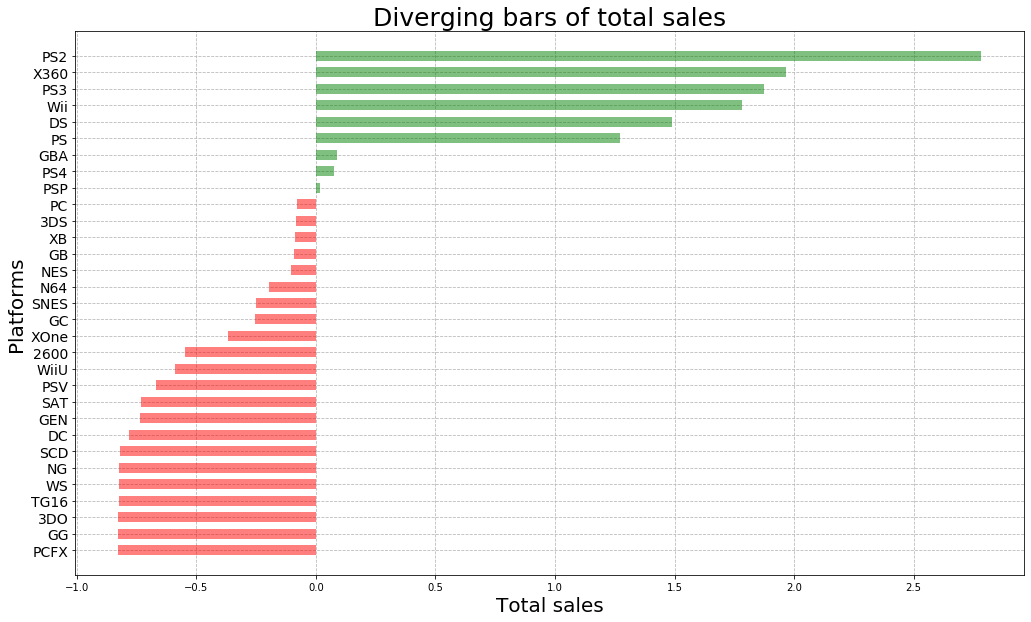

In [75]:
plt.figure(figsize=(17,10))

plt.title("Diverging bars of total sales", fontdict={'size':25})
plt.ylabel("Platforms", fontdict={'size':20})
plt.xlabel("Total sales", fontdict={'size':20})
plt.yticks(sales_by_platform.index, sales_by_platform.platform, fontsize=14)
plt.grid(linestyle='--', alpha=0.9)

plt.hlines(y = sales_by_platform['platform'], xmin = 0, 
          xmax = sales_by_platform['sales_z'], 
           color=sales_by_platform['colors'], alpha = 0.5, linewidth = 10)
plt.show()

We see that the most profitable platforms are the platforms that were released in 00's. Choose them for the further analysis (PSP, PS4, GBA, PS, DS, Wii, PS3, X360, PS2). Their total sales bigger than the mean of the total sales and lie in the range from 1 to 3 standard deviations.

- **Choose the platforms with the greatest total sales and build a distribution based on data for each year.**

In [76]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0     28.96      3.77         8.45          76.0         8.0  everyone   
1      3.58      6.81         0.77           NaN         NaN   unknown   
2     12.76      3.79         3.29          82.0         8.3  everyone   
3     10.93      3.28         2.95          80.0         8.0  everyone   
4      8.89     10.22         1.00           NaN         NaN   unknown   

   critic_score_full  critic_score_full_2  critic_score_full_3  \
0               76.0                 76.0                 76.0   
1                NaN                  NaN                 69.0   
2               82.0                 82.0                 82.0   
3               80.0                 80.0                 80.0   
4                NaN                  NaN                 74.0   

   user_score_full  total_sales  
0              8.0        82.54  
1              7.2        40.24  
2              8.3        35.52  
3              8.0        32.77  
4              7.7        31.38

Take the platforms that we chose before - PSP, PS4, GBA, PS, DS, Wii, PS3, X360, PS2. Use the `query()` method to take only platforms from `sales_by_platform` where `colors == "green"`. Set the new dataframe to variable `top_sales_platforms`.

In [77]:
top_sales_platforms = sales_by_platform.query('colors == "green"')

Take only `platform` column and set to variable `platforms`. USe the `loc` function.

In [78]:
platforms = top_sales_platforms.loc[:, ['platform']]
platforms

platform
22      PSP
23      PS4
24      GBA
25       PS
26       DS
27      Wii
28      PS3
29     X360
30      PS2

Now merge `platforms` with original dataframe `df_games` to get only rows with games that were released on our chosen platfroms. Set merging on 'platfrom' (`on='platform'`), `how='inner'`.

In [79]:
merge = platforms.merge(df_games, how='inner', on='platform')
merge.head()

platform                                    name  year_of_release  \
0      PSP  Grand Theft Auto: Liberty City Stories             2005   
1      PSP            Monster Hunter Freedom Unite             2008   
2      PSP     Grand Theft Auto: Vice City Stories             2006   
3      PSP                Monster Hunter Freedom 3             2010   
4      PSP                                  Daxter             2006   

          genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0        Action      2.90      2.81      0.24         1.73          88.0   
1  Role-Playing      0.47      0.55      4.13         0.34          81.0   
2        Action      1.70      1.99      0.16         1.18          86.0   
3  Role-Playing      0.00      0.00      4.87         0.00           NaN   
4      Platform      2.45      1.01      0.00         0.75          85.0   

   user_score   rating  critic_score_full  critic_score_full_2  \
0         7.6      17+          88.000000                 88.0   
1         8.7      13+          81.000000                 81.0   
2         8.0      17+          86.000000                 86.0   
3         NaN  unknown          68.728571                 68.0   
4         8.7      10+          85.000000                 85.0   

   critic_score_full_3  user_score_full  total_sales  
0                 88.0              7.6         7.68  
1                 81.0              8.7         5.49  
2                 86.0              8.0         5.03  
3                 74.0              7.7         4.87  
4                 85.0              8.7         4.21

Check the result by using the `unique()` method on `platform` column.

In [80]:
merge.platform.unique()

array(['PSP', 'PS4', 'GBA', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'],
      dtype=object)

Create pivot_table from the variable `merge`. Set `index='year_of_release'`, `columns='platform'`, `values='total_sales'` and `aggfunc='sum'`. Save the result into variable `sales_by_platform_years`.

In [81]:
sales_by_platform_years = merge.pivot_table(index='year_of_release', 
                  columns='platform', values='total_sales', aggfunc='sum')
sales_by_platform_years

platform             DS    GBA      PS     PS2     PS3     PS4    PSP     Wii  \
year_of_release                                                                 
1985               0.02    NaN     NaN     NaN     NaN     NaN    NaN     NaN   
1994                NaN    NaN    6.03     NaN     NaN     NaN    NaN     NaN   
1995                NaN    NaN   35.96     NaN     NaN     NaN    NaN     NaN   
1996                NaN    NaN   94.70     NaN     NaN     NaN    NaN     NaN   
1997                NaN    NaN  136.17     NaN     NaN     NaN    NaN     NaN   
1998                NaN    NaN  169.49     NaN     NaN     NaN    NaN     NaN   
1999                NaN    NaN  144.53     NaN     NaN     NaN    NaN     NaN   
2000                NaN   0.07   96.37   39.17     NaN     NaN    NaN     NaN   
2001                NaN  61.53   35.59  166.43     NaN     NaN    NaN     NaN   
2002                NaN  74.16    6.67  205.38     NaN     NaN    NaN     NaN   
2003                NaN  56.67    2.07  184.31     NaN     NaN    NaN     NaN   
2004              17.27  77.91     NaN  211.81     NaN     NaN   7.06     NaN   
2005             130.14  33.86     NaN  160.66     NaN     NaN  43.84     NaN   
2006             119.81   5.28     NaN  103.42   20.96     NaN  55.32  137.15   
2007             146.94   3.40     NaN   75.99   73.19     NaN  46.93  152.77   
2008             145.31    NaN     NaN   53.90  118.52     NaN  34.55  171.32   
2009             119.54    NaN     NaN   26.40  130.93     NaN  37.78  206.97   
2010              85.02    NaN     NaN    5.64  142.17     NaN  35.04  127.95   
2011              26.18    NaN     NaN    0.45  156.78     NaN  17.82   59.65   
2012              11.01    NaN     NaN     NaN  107.36     NaN   7.69   21.71   
2013               1.54    NaN     NaN     NaN  113.25   25.99   3.14    8.59   
2014                NaN    NaN     NaN     NaN   47.76  100.00   0.24    3.75   
2015                NaN    NaN     NaN     NaN   16.82  118.90   0.12    1.14   
2016                NaN    NaN     NaN     NaN    3.60   69.25    NaN    0.18   

platform           X360  
year_of_release          
1985                NaN  
1994                NaN  
1995                NaN  
1996                NaN  
1997                NaN  
1998                NaN  
1999                NaN  
2000                NaN  
2001                NaN  
2002                NaN  
2003                NaN  
2004                NaN  
2005               8.25  
2006              51.62  
2007              95.41  
2008             135.26  
2009             120.29  
2010             170.03  
2011             143.84  
2012              99.74  
2013              88.58  
2014              34.74  
2015              11.96  
2016               1.52

Plot the lineplot from seaborn library for these platforms. Use `sales_by_platform_years` as a data for the lineplot. Set title, ylabel, the `x axis` tick locations and `xticklabels` (take column `'year_of_release'` from the `distr_by_year`).

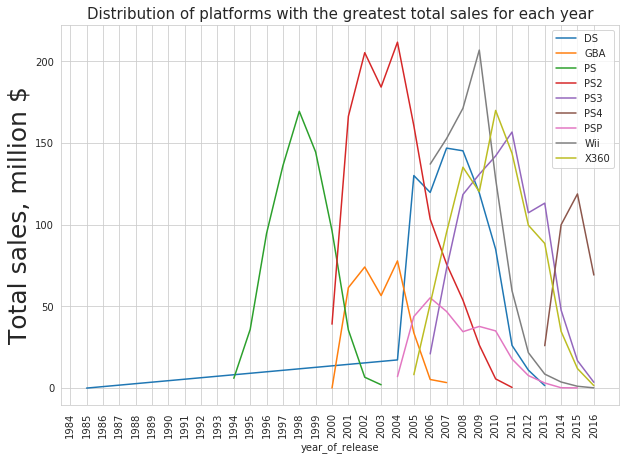

In [82]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,7))
    
    ax.set_title("Distribution of platforms with the greatest total sales for each year", 
             fontdict={'size':15})
    ax.set_ylabel("Total sales, million $", fontdict={'size':25})
    ax.set_xticks(distr_by_year['year_of_release'])
    ax.set_xticklabels(distr_by_year['year_of_release'], rotation=90, fontdict={'size':10})
    sns.lineplot(data=sales_by_platform_years, dashes=False)

We see the lifetime of each platform. Analyze it below.

- **Find platforms that used to be popular but now have zero sales. Find out how long it is generally take for new platforms to appear and old ones to fade.**

From this graph we see what:
- PS first released games in 1994 and finished in 2003 with peak sales in 1998.
- PS2 first released games in 2000 (right before PS fade) and finished in 2011 with peak sales between 2002 and 2004.
- PS3 first released games in 2006 and finished in 2016 with peak sales in 2011 (when it became most popular PS2 became unrelevant).
- PS4 first released games in 2013 and with peak sales in 2015 and it's steal popular because there isn't new version of PS. It can be popular 4-5 years more until PS5 will be released (approximately in 2020 - every 6 years appears new PS platform). According to previous statistic - every PS existed in average 10 years.  


- PSP first released games in 2004 and finished in 2015 with peak sales between 2005 and 2009. It's portable PlayStation, so it had less sales.


- Wii from Nintendo first released games in 2006 (started with huge sales first year - almost 150 millions dollars that was the record) and beated the all time record with peak sales of games on this platform in 2009 above 220 millions dollars. But sales fell sharply and after 2012 (when released Wii U). And finished to release games on this platform in 2016. Also it took 10 years for platform to exist with peak in the middle of period or even on the first 3 years.


- GBA (portable Game Boy from Nintendo) first released games in 2000 and finished in 2007 with peak sales between 2001 and 2004. It had less lifetime. Because it wasn't so popular as PS and had much less games sales.
- DS (next portable Game Boy from Nintendo) first released games in 2004 (after break almost 20 years -appears that it had the same name in 1985) and finished in 2013 with peak sales between 2005 and 2009. It had better sales than PSP (better than every portable platform, almost on the same level with main platforms and it was successful in the same time with 'big brother' Wii).


- X360 first released games in 2005 and finished in 2015 with peak sales in 2010.

#### Conclusion

The 9 most popular platforms of all times released their games from 1994 (only PS), mostly from 2000 and 2004. Every platform had 10-years cycle - appears, peak sales and fades.
As we saw from the lollipop graph peak of number of games released each year was between 2002 and 2011. After this period new released platforms didn't have such number of new games released and so high total sales like it was previous years.

Also we see that X360 and PS3 appeared in 2005 and 2006 and have identical form of the graph and the same direction in the same years. So they grew and fell simultaneously in the same period. But new PS4 already had better success (next Xbox - Xone was released in the same 2013, but didn't have the same sales).

Wii from Nintendo had great success fast and fell as fast. Despite being released at the same time as PS3 and X360. And next Wii U, also as next Xone didn't have the same success.

Our conclusion that the most popular and the most profitable platforms are PS, Xbox and Wii. But PS3, X360 and Wii already old versions and new games don't release for them. We can look at their new version in our prognosis - PS4, Xone and Wii U, but the leader among them is PS4.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
That is also correct to check platform life cycle.
</div>

### Determine the period for analysis

- **Determine the period we should take for data. Decide it from previous two results. The data should allow us to build a prognosis for 2017.**

We should take the most relevant platforms from the last generations that still have games released on them. But it haven't enough information to analysis for us. So we should take the period when the growth of games production started and when the most successful platforms appeared (PS2). So let's take the data from 2000.

In [83]:
data_new = df_games.query('year_of_release >= 2000')
data_new.head()

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0     28.96      3.77         8.45          76.0         8.0  everyone   
2     12.76      3.79         3.29          82.0         8.3  everyone   
3     10.93      3.28         2.95          80.0         8.0  everyone   
6      9.14      6.50         2.88          89.0         8.5  everyone   
7      9.18      2.93         2.84          58.0         6.6  everyone   

   critic_score_full  critic_score_full_2  critic_score_full_3  \
0               76.0                 76.0                 76.0   
2               82.0                 82.0                 82.0   
3               80.0                 80.0                 80.0   
6               89.0                 89.0                 89.0   
7               58.0                 58.0                 58.0   

   user_score_full  total_sales  
0              8.0        82.54  
2              8.3        35.52  
3              8.0        32.77  
6              8.5        29.80  
7              6.6        28.91

#### Conclusion

Work only with the data that we've decided is relevant and disregard the data for previous years.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Great that you used only recent sales data and platform; however, I would suggest keeping only data after 2014 so that we will have only the latest platform generation (well not the latest anymore).
    

<div class="alert alert-info"> <b>Student comments:</b> I think that we don't have full and enough data for the last year. And also we want to compare new generation with previous that already finished their lifecycle. We want to see what sales new generation could make 5 years later. Or to check that new generations make less money and games bum already passed. Later we'll add new generation to our analysis to check what features they inherited from their predecessors.</div>

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>

That a good argumentation, however, I can advise to carefully check whether this is indeed the case and comparable. 
Sometimes old trends could be only misleading and have an impact of conclusions.  

### Platforms leaders and outsiders

- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

Create pivot table for `data_new` grouped by `year_of_release`, with `columns='platform'` and sum `total_sales` as values. Set it to a new variable `df_sales`.

In [84]:
df_sales = pd.pivot_table(
    data_new, index='year_of_release', columns='platform', 
    values='total_sales', aggfunc='sum')
df_sales.tail()

platform           3DS  DC     DS  GB  GBA  GC  N64     PC  PS  PS2     PS3  \
year_of_release                                                               
2012             51.36 NaN  11.01 NaN  NaN NaN  NaN  23.22 NaN  NaN  107.36   
2013             56.57 NaN   1.54 NaN  NaN NaN  NaN  12.38 NaN  NaN  113.25   
2014             43.76 NaN    NaN NaN  NaN NaN  NaN  13.28 NaN  NaN   47.76   
2015             27.78 NaN    NaN NaN  NaN NaN  NaN   8.52 NaN  NaN   16.82   
2016             15.14 NaN    NaN NaN  NaN NaN  NaN   5.25 NaN  NaN    3.60   

platform            PS4   PSP    PSV  WS    Wii   WiiU   X360  XB   XOne  
year_of_release                                                           
2012                NaN  7.69  16.19 NaN  21.71  17.56  99.74 NaN    NaN  
2013              25.99  3.14  10.59 NaN   8.59  21.65  88.58 NaN  18.96  
2014             100.00  0.24  11.90 NaN   3.75  22.03  34.74 NaN  54.07  
2015             118.90  0.12   6.25 NaN   1.14  16.35  11.96 NaN  60.14  
2016              69.25   NaN   4.25 NaN   0.18   4.60   1.52 NaN  26.15

Use the `shift()` method with the parameter, called period, equel `+1` to shift values in a column one row down to check how sales changed Year-over-year (YOY). Set to a variable `sales_dynamics` and transpose the table.

In [85]:
sales_dynamics = (df_sales-df_sales.shift(+1)).T
sales_dynamics

year_of_release  2000    2001   2002   2003   2004    2005   2006   2007  \
platform                                                                   
3DS               NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   
DC                NaN   -4.92  -0.78    NaN    NaN     NaN    NaN    NaN   
DS                NaN     NaN    NaN    NaN    NaN  112.87 -10.33  27.13   
GB                NaN  -10.52    NaN    NaN    NaN     NaN    NaN    NaN   
GBA               NaN   61.46  12.63 -17.49  21.24  -44.05 -28.58  -1.88   
GC                NaN     NaN  25.47  -1.20 -21.79   -1.20 -16.36 -10.99   
N64               NaN  -30.72  -3.17    NaN    NaN     NaN    NaN    NaN   
PC                NaN    0.81   3.10   0.27   1.55   -6.02  -1.52   6.43   
PS                NaN  -60.78 -28.92  -4.60    NaN     NaN    NaN    NaN   
PS2               NaN  127.26  38.95 -21.07  27.50  -51.15 -57.24 -27.43   
PS3               NaN     NaN    NaN    NaN    NaN     NaN    NaN  52.23   
PS4               NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   
PSP               NaN     NaN    NaN    NaN    NaN   36.78  11.48  -8.39   
PSV               NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   
WS                NaN   -0.40    NaN    NaN    NaN     NaN    NaN    NaN   
Wii               NaN     NaN    NaN    NaN    NaN     NaN    NaN  15.62   
WiiU              NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   
X360              NaN     NaN    NaN    NaN    NaN     NaN  43.37  43.79   
XB                NaN   21.27  25.75   7.03  10.38  -16.34 -39.04  -9.49   
XOne              NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   

year_of_release   2008   2009   2010   2011   2012   2013   2014   2015   2016  
platform                                                                        
3DS                NaN    NaN    NaN    NaN -11.84   5.21 -12.81 -15.98 -12.64  
DC                0.02    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
DS               -1.63 -25.77 -34.52 -58.84 -15.17  -9.47    NaN    NaN    NaN  
GB                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
GBA                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
GC                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
N64                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
PC                3.14   4.49   7.37  10.75 -11.81 -10.84   0.90  -4.76  -3.27  
PS                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
PS2             -22.09 -27.50 -20.76  -5.19    NaN    NaN    NaN    NaN    NaN  
PS3              45.33  12.41  11.24  14.61 -49.42   5.89 -65.49 -30.94 -13.22  
PS4                NaN    NaN    NaN    NaN    NaN    NaN  74.01  18.90 -49.65  
PSP             -12.38   3.23  -2.74 -17.22 -10.13  -4.55  -2.90  -0.12    NaN  
PSV                NaN    NaN    NaN    NaN  11.56  -5.60   1.31  -5.65  -2.00  
WS                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
Wii              18.55  35.65 -79.02 -68.30 -37.94 -13.12  -4.84  -2.61  -0.96  
WiiU               NaN    NaN    NaN    NaN    NaN   4.09   0.38  -5.68 -11.75  
X360             39.85 -14.97  49.74 -26.19 -44.10 -11.16 -53.84 -22.78 -10.44  
XB               -0.37    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
XOne               NaN    NaN    NaN    NaN    NaN    NaN  35.11   6.07 -33.99

Now plot the heatmap that shows how sales on each platform changed Y-o-Y. Create subplots, assign it to the `fig, ax`. Set the `figsize=(15,10)`. Set the title and `ylabel`, `xlabel`. Plot the `heatmap` from the seaborn library, set annotation True (`annot=True`), colors of heatmap from blue to red (`cmap = 'RdBu_r'`), and widths of lines between cells (`linewidths=.5`). 

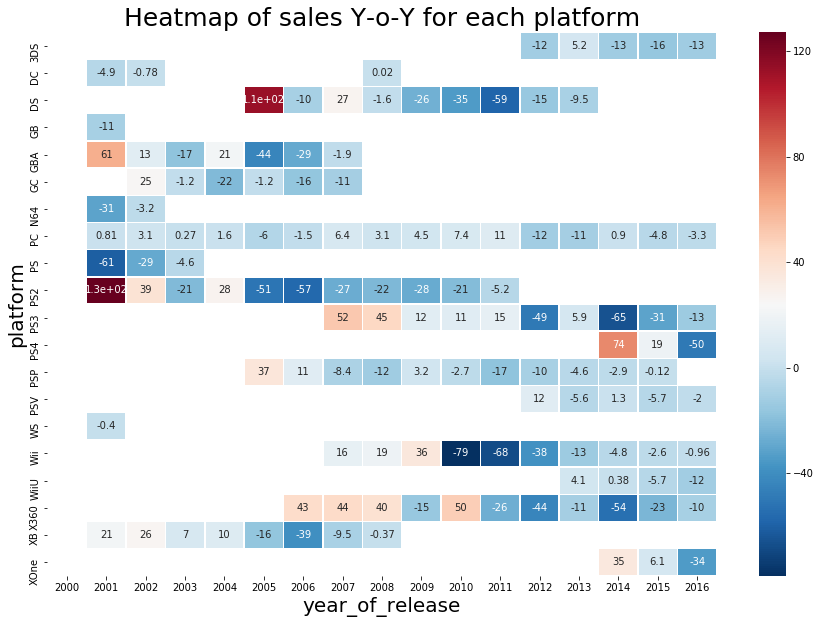

In [86]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_title("Heatmap of sales Y-o-Y for each platform", fontdict={'size':25})
ax.set_ylabel('Platforms', fontdict={'size':20})
ax.set_xlabel("Years", fontdict={'size':20})

sns.heatmap(sales_dynamics, annot=True, cmap = 'RdBu_r', linewidths=.5)

We see almost the same picture for each platform - how game's sales rise on each platform and after that decrease, but here we've got the difference in color and numbers (in millions) Y-o-Y sales.

#### Conclusion 1

- PS: we see that it already about to fade in the start 00's. In 2001 it's a big reduction (-61 million) and after slow drop till it fades in 2003 (-29  and  -4.6 millions accordingly).
- PS2: in 2001 it's huge sales growth comparing with 2000 (over 130 millions growth - probably because it was first full year of that platform and game studios create new games for it). After that in 2002 it grew but only by 39 millions and it stood on the peaks untill 2005, and had big reduction in 2006 (-57 millions) and slowly decreased next years (between -27 to -5.2 millions every year lost)
- PS3: it had been grown fast in 2007 (+52 millions) comparing with the year of release (2006) and also in 2008 (+45 millions). After that - 3 years of slightly growth (+11-15 millions each year) and reduction after 2012 (-49, -65, -31, -13 millions every year had lost).
- PS4: huge growth camparing with first year in 2014 (+74 millions) and growth in 2015 (+19 millions) and big drop in 2016 (-50 millions that's almost the half of previous years growth, maybe there is not full data for sales in the last quarters of 2016). 


- Wii: it started from the high point of sales, so we don't see huge growth here in first years (+16, +19, +36 millions) but we can see dramatically fast drop in 2010, 2011 and 2012 (-79, -68, -38 millions accordingly)


- X360: we see alomost five years in the row of growth from 2006 to 2010 (+43, +44, +40, only here -15 and +50 millions). Games on that platform could keep gamers and keep sales growth long time (probably kept to release a lot of games) and had slow reduction (-26, -44, -11, -54, -23, 10 millions) next years. That good results. That's the reason why X360 has second place in the total sales for all years after PS2


- One point that we have on the heatmap and don't have on the lineplot above - are the platforms that hadn't been in the top 9 platforms (because we choose here every platform that had sales after 2000). So we can compare such platforms here as XOne, WiiU and PS4 (only which had been in the top). And wee see very slow growth of WiiU (+4.1, +0.38 millions) and -5.7, -12 millions reduction last years. While PS4 had much bigger growth of sales and bigger sales at all. And XOne was better than WiiU (+35, +6.1 but -34 millions last year).

Now check the distribution of number of games on each platform above. Create the list of chosen platforms.

In [87]:
platforms_list = ['WiiU', 'PC', 'XOne','PSP', 'PS4', 'GBA', 'PS', 'DS', 'Wii', 
                  'PS3', 'X360', 'PS2']
platforms_list

['WiiU',
 'PC',
 'XOne',
 'PSP',
 'PS4',
 'GBA',
 'PS',
 'DS',
 'Wii',
 'PS3',
 'X360',
 'PS2']

Use the `query()` to create dataframe where `year_of_release >=2000` and `platform in @platforms_list`. 

In [88]:
games_platforms = df_games.query('year_of_release >=2000 and platform in @platforms_list')
games_platforms.platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', 'PC', 'PSP',
       'XOne', 'WiiU', 'PS'], dtype=object)

Build pivot table where `index ='year_of_release'`, `columns='platform'` and count game's names for each year of chosen platform. Set variable's name `games_distr`.

In [89]:
games_distr = games_platforms.pivot_table(index='year_of_release', 
                     columns='platform', values='name', aggfunc='count')
games_distr

platform            DS    GBA     PC     PS    PS2    PS3    PS4    PSP  \
year_of_release                                                           
2000               NaN    1.0    7.0  160.0   82.0    NaN    NaN    NaN   
2001               NaN  107.0   15.0   91.0  185.0    NaN    NaN    NaN   
2002               NaN  198.0   19.0   20.0  280.0    NaN    NaN    NaN   
2003               NaN  150.0   33.0    3.0  256.0    NaN    NaN    NaN   
2004              23.0  175.0   30.0    NaN  259.0    NaN    NaN   15.0   
2005             118.0  135.0   37.0    NaN  260.0    NaN    NaN   95.0   
2006             201.0   39.0   52.0    NaN  259.0   27.0    NaN  189.0   
2007             376.0    6.0   62.0    NaN  214.0   90.0    NaN  133.0   
2008             492.0    NaN   76.0    NaN  191.0  138.0    NaN  100.0   
2009             403.0    NaN  107.0    NaN   96.0  162.0    NaN  161.0   
2010             323.0    NaN   90.0    NaN   38.0  181.0    NaN  188.0   
2011             153.0    NaN  139.0    NaN    7.0  215.0    NaN  139.0   
2012              23.0    NaN   61.0    NaN    NaN  148.0    NaN  106.0   
2013               8.0    NaN   38.0    NaN    NaN  126.0   16.0   54.0   
2014               NaN    NaN   47.0    NaN    NaN  108.0   75.0   10.0   
2015               NaN    NaN   50.0    NaN    NaN   73.0  137.0    3.0   
2016               NaN    NaN   54.0    NaN    NaN   38.0  164.0    NaN   

platform           Wii  WiiU   X360  XOne  
year_of_release                            
2000               NaN   NaN    NaN   NaN  
2001               NaN   NaN    NaN   NaN  
2002               NaN   NaN    NaN   NaN  
2003               NaN   NaN    NaN   NaN  
2004               NaN   NaN    NaN   NaN  
2005               NaN   NaN   18.0   NaN  
2006              44.0   NaN   93.0   NaN  
2007             185.0   NaN  123.0   NaN  
2008             282.0   NaN  146.0   NaN  
2009             325.0   NaN  172.0   NaN  
2010             253.0   NaN  182.0   NaN  
2011             143.0   NaN  206.0   NaN  
2012              31.0  32.0  106.0   NaN  
2013              12.0  42.0   75.0  19.0  
2014               6.0  31.0   63.0  61.0  
2015               4.0  28.0   35.0  80.0  
2016               1.0  14.0   13.0  87.0

Plot the lineplot from seaborn for these platforms. Use `games_distr` as a data for the lineplot. Set title, ylabel, the `x axis` tick locations and `xticklabels` (take column `'year_of_release'` from the `distr_by_year`).

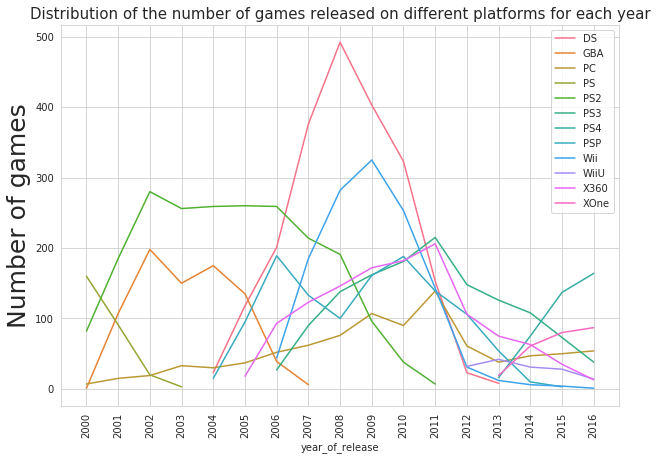

In [90]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,7))
    
    ax.set_title(
        "Distribution of the number of games released on different platforms for each year", 
             fontdict={'size':15})
    ax.set_ylabel("Number of games", fontdict={'size':25})
    ax.set_xticks(distr_by_year['year_of_release'])
    ax.set_xticklabels(distr_by_year['year_of_release'], rotation=90, fontdict={'size':10})
    sns.lineplot(data=games_distr, dashes=False)

#### Conclusion 2

- We see that a lot of games were released on the `DS` platform from 2007 to 2010 that contributed to it's total sales in these years. They released on the `DS` more games than on the other platforms. But it didn't help them to make more sales than others.
- All the platforms are shrinking now even the new generation `WiiU`. But we might not have full data for the last year.
- Only 3 platforms are growing - `PS4`, `XOne` and `PC` (after drop in the number of games started to grow YoY).
- `PS3` still has some games released, `X360`, `WiiU`, but others 'died'.
- We can consider to the next year prognosis only games released on `PS4`, `XOne` and `PC`.

### Boxplot for total sales of games by different platforms

- Build a box plot for the global sales of all games, broken down by platform. Check if the differences in sales are significant. What about average sales on various platforms? Describe our findings.

Create order of platforms here from the variable `platforms`. We'll use in the `sns.boxplot()`.

In [91]:
order = platforms_list
order

['WiiU',
 'PC',
 'XOne',
 'PSP',
 'PS4',
 'GBA',
 'PS',
 'DS',
 'Wii',
 'PS3',
 'X360',
 'PS2']

Transform `platforms_list` to dataframe. Use `pd.DataFrame()`. Set column's name to `platform`. We'll use it to set order of our medians that we'll calculate below.

In [92]:
df_platforms_list = pd.DataFrame(platforms_list)
df_platforms_list.set_axis(['platform'], axis=1, inplace=True)
df_platforms_list

platform
0      WiiU
1        PC
2      XOne
3       PSP
4       PS4
5       GBA
6        PS
7        DS
8       Wii
9       PS3
10     X360
11      PS2

Group the `df_new_platforms` (sales after 2000 and only chosen platforms) by `platform` and `year_of_release` and sum all `total_sales` for it. Reset index and set it to the variable `sales_by_platform_grouped`.

In [93]:
sales_by_platform_grouped = games_platforms.groupby(
    ['platform', 'year_of_release'])['total_sales'].sum().reset_index()
sales_by_platform_grouped.tail()

platform  year_of_release  total_sales
105     X360             2016         1.52
106     XOne             2013        18.96
107     XOne             2014        54.07
108     XOne             2015        60.14
109     XOne             2016        26.15

Calculate the median sales for each platform for all the years. Group by `platform`.

In [94]:
medians = sales_by_platform_grouped.groupby('platform')['total_sales'].median().sort_values()
medians

platform
PC        9.280
WiiU     17.560
PS       21.130
PSP      26.185
XOne     40.110
GBA      45.265
Wii      59.650
PS4      84.625
PS2      89.705
X360     91.995
DS      102.280
PS3     107.360
Name: total_sales, dtype: float64

Merge again the results in `medians` with `df_platforms_list` to get the right order and loc only `total_sales` column. We'll use this order for annotation on boxplot.

In [95]:
medians_order = df_platforms_list.merge(medians, how='inner', on='platform')['total_sales']
medians_order

0      17.560
1       9.280
2      40.110
3      26.185
4      84.625
5      45.265
6      21.130
7     102.280
8      59.650
9     107.360
10     91.995
11     89.705
Name: total_sales, dtype: float64

Plot the boxplot for these platforms. Use boxplot from the seaborn library. Set title, x,ylabels and grid. Make it sorted by revenue from the list of platforms `order`.

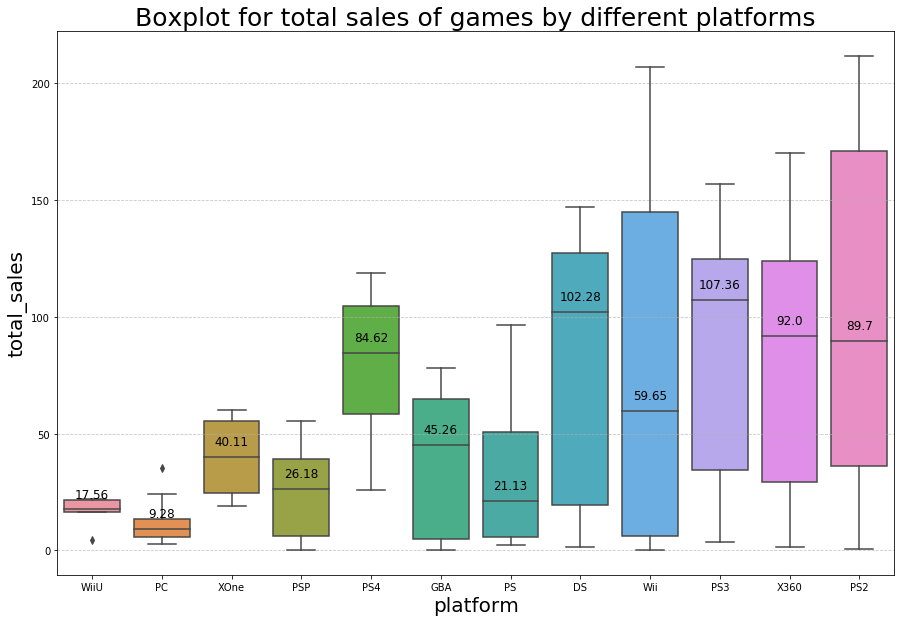

In [96]:
plt.figure(figsize=(15,10))

plt.title("Boxplot for total sales of games by different platforms", fontdict={'size':25})
plt.xlabel('Platforms', fontdict={'size':20})
plt.ylabel('Total sales', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.7)

box = sns.boxplot(x='platform', y='total_sales', data=sales_by_platform_grouped, order=order)

for i in range(len(medians_order)):
    box.annotate(str(round(medians_order[i], 2)), xy=(i, medians_order[i]+5), 
                 size=12, horizontalalignment = 'center')
    
plt.show()

#### Conclusion

- We see that difference in sales are significant.
- `PS2` and `Wii` have the wide range of total sales in different years (from almost zero to over 200 millions), but `PS2` have higher medians sales (89.7 millions) against 59.65 millions of `Wii`.
- `Wii` had higher sales some years than `PS2`, but in general it was more weak years, so the median sales are lower.
- `PS4` has small range, but higher sales, so medians sales are high - 84.62 (but it's only because this platform is new and it didn't start fade, and didn't fall to zero sales). The same `XOne` and `WiiU`. But they have lower sales.
- All the platforms that are shrinking have next to zero or zero values.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you created a boxplot with selected platforms to compare key statistics. 
</div>

### Correlation between reviews and total sales

- Take a look at how user and professional reviews affect sales for one popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Create the new variable `data_scores` from the `games_platforms` and take only `platform`, `total_sales`, `critic_score_full_3` and `user_score_full` columns.

In [97]:
data_scores = games_platforms[['platform', 
                         'total_sales', 'critic_score_full_3', 'user_score_full']]
data_scores.head()

platform  total_sales  critic_score_full_3  user_score_full
0      Wii        82.54                 76.0              8.0
2      Wii        35.52                 82.0              8.3
3      Wii        32.77                 80.0              8.0
6       DS        29.80                 89.0              8.5
7      Wii        28.91                 58.0              6.6

#### PS2

Take a look at `PS2`, because ih had the most games released.

In [98]:
data_scores_PS2 = data_scores[data_scores['platform'] == 'PS2']
data_scores_PS2.head()

platform  total_sales  critic_score_full_3  user_score_full
17      PS2        20.81                 95.0              9.0
24      PS2        16.15                 95.0              8.7
28      PS2        14.97                 95.0              8.4
38      PS2        13.10                 97.0              8.5
48      PS2        11.65                 89.0              8.5

Write function `score_effect(platform, score_type)` to plot scatterplots and calculate correlations for chosen platform and score type (`critic_score_full_3` or `user_score_full`):
- Inside the function create dataframe `data` from the dataframe `data_scores`, where we take only platform that mentioned as `score_effect`s argument and leave only `total_sales` column and one of the score type column (we set it as second argument in `score_effect`). 
- After that plot the scatterplot where coordinates of dots are `x` equal to `score_type`'s values and `y = total_sales`.
- Next step is calculation of correlation between `total_sales` and one of the `score_type`. Use the `corr()` method. Set it a variable `corr`.
- After that print the result and conclusion - `Correlation is positive` if the result (`corr`) is bigger than 70%. Else - `There is no correlation`.

In [99]:
def score_effect(platform, score_type):
    data = data_scores[data_scores['platform'] == platform][['total_sales', score_type]]
    data.plot.scatter(y= 'total_sales', x=score_type)
    
    corr = data['total_sales'].corr(data[score_type])
    
    print('Correlation between', score_type, 'and', 'total sales on the', platform, 
          'is {:.2%}'.format(corr))
    if corr > 70:
        result = 'Correlation is positive'
    else: 
        result = 'There is no correlation'
        print(result)

Use our function `score_effect` for `PS2` and `critic_score_full_3`.

Correlation between critic_score_full_3 and total sales on the PS2 is 35.00%
There is no correlation


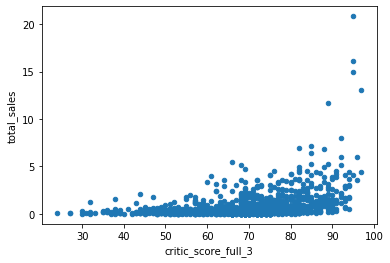

In [100]:
score_effect('PS2', 'critic_score_full_3')

A lot of games didn't have high profits. And diffrerent `critic_score`'s didn't affect on profits so much. The outliers are high-profitable and they have good scores but correlation don't strong.

Use our function `score_effect` for `PS2` and `user_score_full`.

Correlation between user_score_full and total sales on the PS2 is 20.31%
There is no correlation


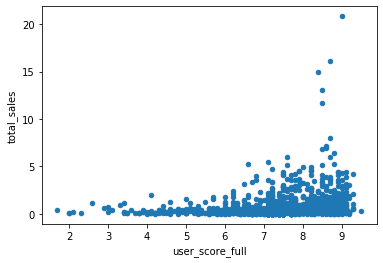

In [101]:
score_effect('PS2', 'user_score_full')

A lot of games didn't have high profits. And diffrerent `user_score`'s didn't affect on profits - there are between 0 and 2.5 millions dollars sales for almost every games (both with low and high score). And only outliers are high-profitable and they are with high `user_score`. With higher `user_score` the total sales seek to be higher, but correlation is low.

Keeping our conclusions in mind, compare the sales of the same games on other platforms.

#### X360

Correlation between critic_score_full_3 and total sales on the X360 is 36.33%
There is no correlation


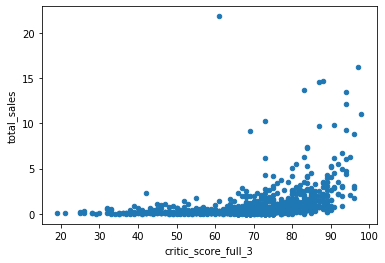

In [102]:
score_effect('X360', 'critic_score_full_3')

Correlation between user_score_full and total sales on the X360 is 7.59%
There is no correlation


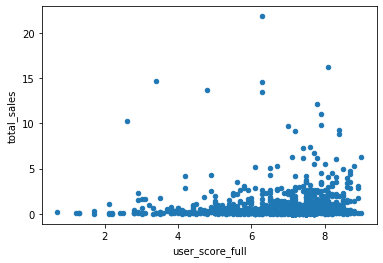

In [103]:
score_effect('X360', 'user_score_full')

#### PS3

Correlation between critic_score_full_3 and total sales on the PS3 is 40.51%
There is no correlation


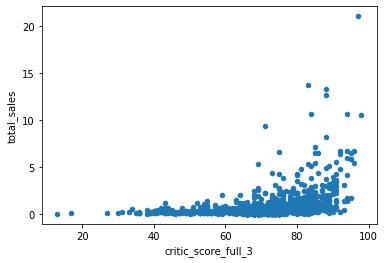

In [104]:
score_effect('PS3', 'critic_score_full_3')

Correlation between user_score_full and total sales on the PS3 is 6.84%
There is no correlation


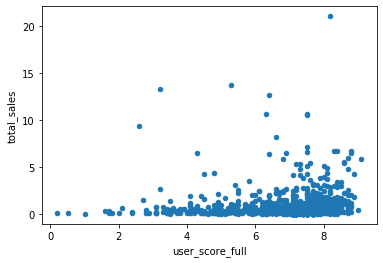

In [105]:
score_effect('PS3', 'user_score_full')

#### Wii

Correlation between critic_score_full_3 and total sales on the Wii is 11.07%
There is no correlation


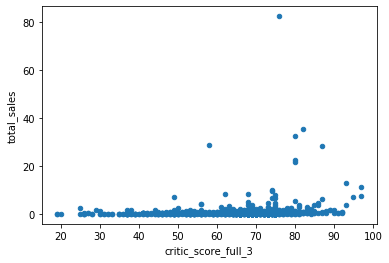

In [106]:
score_effect('Wii', 'critic_score_full_3')

Correlation between user_score_full and total sales on the Wii is 7.59%
There is no correlation


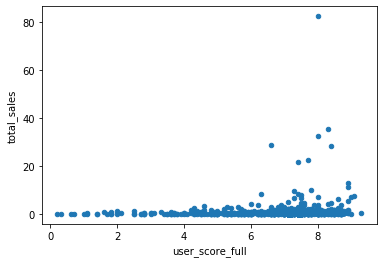

In [107]:
score_effect('Wii', 'user_score_full')

#### WiiU

Correlation between critic_score_full_3 and total sales on the WiiU is 32.41%
There is no correlation


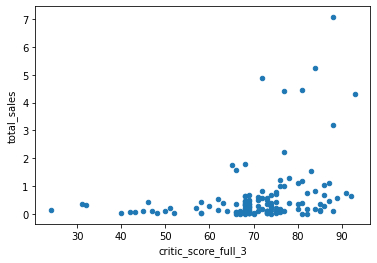

In [108]:
score_effect('WiiU', 'critic_score_full_3')

Correlation between user_score_full and total sales on the WiiU is 34.07%
There is no correlation


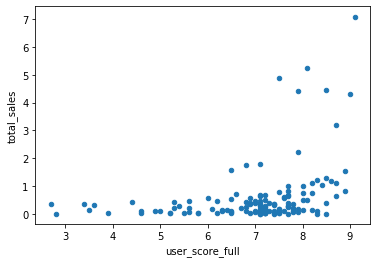

In [109]:
score_effect('WiiU', 'user_score_full')

#### XOne

Correlation between critic_score_full_3 and total sales on the XOne is 37.87%
There is no correlation


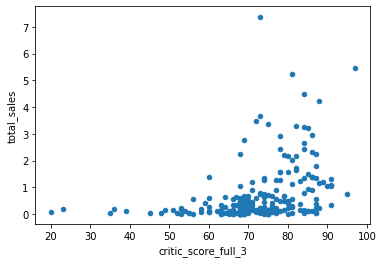

In [110]:
score_effect('XOne', 'critic_score_full_3')

Correlation between user_score_full and total sales on the XOne is -8.34%
There is no correlation


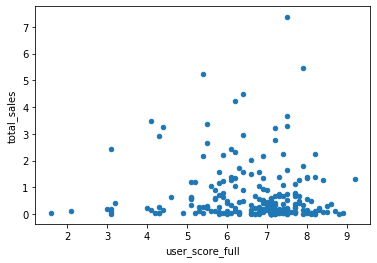

In [111]:
score_effect('XOne', 'user_score_full')

#### PS4

Correlation between critic_score_full_3 and total sales on the PS4 is 35.14%
There is no correlation


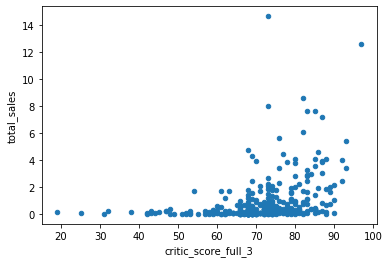

In [112]:
score_effect('PS4', 'critic_score_full_3')

Correlation between user_score_full and total sales on the PS4 is -4.73%
There is no correlation


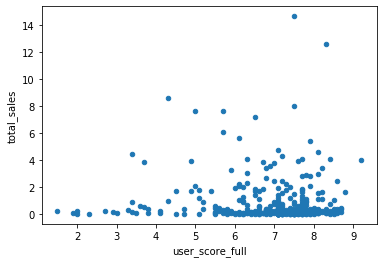

In [113]:
score_effect('PS4', 'user_score_full')

#### PC

Correlation between critic_score_full_3 and total sales on the PC is 26.44%
There is no correlation


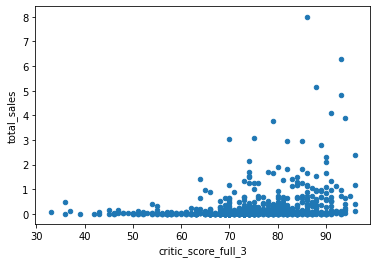

In [114]:
score_effect('PC', 'critic_score_full_3')

Correlation between user_score_full and total sales on the PC is -2.01%
There is no correlation


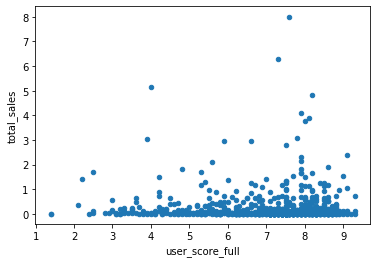

In [115]:
score_effect('PC', 'user_score_full')

#### Conclusion

- We don't see high correlation between reviews and total sales. For some games sales were big enough and it had high review scores. But for other games with high score it had both high and low sales. So it was more random.
- Correlation between `critic_score` and `total_sales` is in range between 17.79% (for `Wii`) and 43.28% (for `PS3`), and it's low correlation.
- Correlation between `user_score` and `total_sales` is in range between -6.89% (for `XOne`) and 40.02% (for `WiiU`). It's interesting that for newest platforms - `PS4`, `XOne` and also for `PC` user's score had negative correlation, i.e. even games with low score get high total sales. The reason might be that last time people are waiting for some games, buy it, get disappointed and left bad review. And the game still has high sales.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots and I totally agree with your conclusions. 
    


### General distribution of games by genre

- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can we generalize about genres with high and low sales?

Count how many games each genre are in our dataset `games_platforms`. For that group by `genre` and count `name` column. Sort values by `name` in descending order and reset index. After that take only `genre` and `name` columns.

In [116]:
genres_count = games_platforms.groupby('genre')['name'].count().reset_index().sort_values(
    by='name', ascending=False).reset_index()
genres_count = genres_count.loc[:, ['genre', 'name']]
genres_count

genre  name
0         Action  2477
1         Sports  1635
2           Misc  1436
3   Role-Playing  1060
4      Adventure  1008
5        Shooter   941
6         Racing   819
7     Simulation   697
8       Platform   546
9       Fighting   512
10      Strategy   489
11        Puzzle   432

Calculate the `market_share` of genre by number of games released in each genre.

In [117]:
genres_count['market_share'] = round((
    genres_count['name'] / genres_count['name'].sum()) *100, 2)
genres_count

genre  name  market_share
0         Action  2477         20.55
1         Sports  1635         13.57
2           Misc  1436         11.92
3   Role-Playing  1060          8.80
4      Adventure  1008          8.36
5        Shooter   941          7.81
6         Racing   819          6.80
7     Simulation   697          5.78
8       Platform   546          4.53
9       Fighting   512          4.25
10      Strategy   489          4.06
11        Puzzle   432          3.58

Create the `genres_order` variable converted to list. We'll use it in our barplot.

In [118]:
genres_count_order = genres_count.genre.to_list()
genres_count_order

['Action',
 'Sports',
 'Misc',
 'Role-Playing',
 'Adventure',
 'Shooter',
 'Racing',
 'Simulation',
 'Platform',
 'Fighting',
 'Strategy',
 'Puzzle']

Calculate `total_sales` for each genre. For that group by `genre` and sum `total_sales` column. Sort values by `total_sales` in descending order and reset index. Take only `genre` and `total_sales` columns.

In [119]:
genres_sales = games_platforms.groupby('genre')['total_sales'].sum().reset_index().sort_values(
    by='total_sales', ascending=False).reset_index()
genres_sales = genres_sales.loc[:, ['genre', 'total_sales']]
genres_sales

genre  total_sales
0         Action      1351.96
1         Sports      1031.15
2        Shooter       831.08
3           Misc       674.94
4   Role-Playing       592.43
5         Racing       485.84
6       Platform       411.43
7     Simulation       292.08
8       Fighting       264.19
9      Adventure       162.96
10        Puzzle       125.15
11      Strategy       101.35

Calculate the `market_share` of each genre by total sales.

In [120]:
genres_sales['market_share'] = round((
    genres_sales['total_sales'] / genres_sales['total_sales'].sum()) *100, 2)
genres_sales

genre  total_sales  market_share
0         Action      1351.96         21.38
1         Sports      1031.15         16.30
2        Shooter       831.08         13.14
3           Misc       674.94         10.67
4   Role-Playing       592.43          9.37
5         Racing       485.84          7.68
6       Platform       411.43          6.51
7     Simulation       292.08          4.62
8       Fighting       264.19          4.18
9      Adventure       162.96          2.58
10        Puzzle       125.15          1.98
11      Strategy       101.35          1.60

Create the `genres_sales_order` variable converted to list. We'll use it in our barplot.

In [121]:
genres_sales_order = genres_sales.genre.to_list()
genres_sales_order

['Action',
 'Sports',
 'Shooter',
 'Misc',
 'Role-Playing',
 'Racing',
 'Platform',
 'Simulation',
 'Fighting',
 'Adventure',
 'Puzzle',
 'Strategy']

Plot the `barplot` from the seaborn library to show distribution of games by genre and `lineplot` to show `Market share` of genre by number of games. Create second scale on the same graph for market share in %. Set `ax2 = ax1.twinx()`. Set title, two ylabel and xlabel. For xticklabels set `genres_count['genre']`.

[Text(0, 0, 'Action'),
 Text(0, 0, 'Sports'),
 Text(0, 0, 'Misc'),
 Text(0, 0, 'Role-Playing'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Shooter'),
 Text(0, 0, 'Racing'),
 Text(0, 0, 'Simulation'),
 Text(0, 0, 'Platform'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Strategy'),
 Text(0, 0, 'Puzzle')]

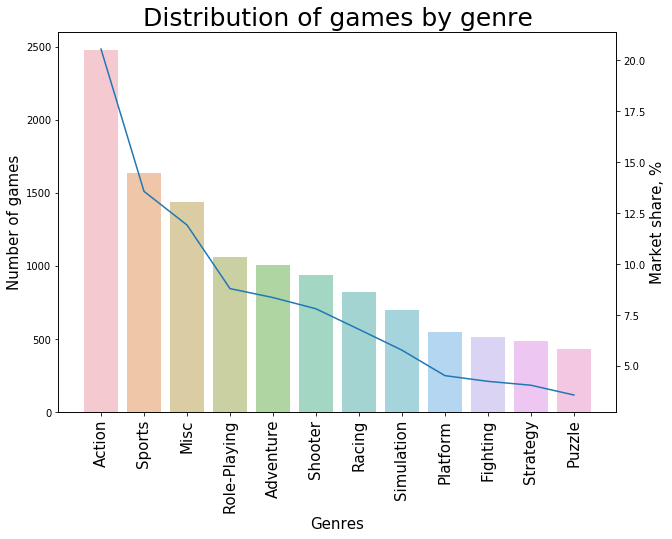

In [122]:
fig, ax1 = plt.subplots(figsize=(10,7))


sns.barplot(data=genres_count, x='genre', y='name', 
            order=genres_count_order, alpha=0.5, ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=genres_count, x='genre', y='market_share', 
                 sort=False, dashes=False, ax=ax2)

plt.title('Distribution of games by genre', fontdict={'size':25})
ax1.set_ylabel('Number of games', fontdict={'size':15})
ax2.set_ylabel('Market share, %', fontdict={'size':15})
ax1.set_xlabel("Genres", fontdict={'size':15})

ax1.set_xticklabels(genres_count['genre'], rotation=90, fontdict={'size':15})

Make the same for the most profitable genres.

[Text(0, 0, 'Action'),
 Text(0, 0, 'Sports'),
 Text(0, 0, 'Shooter'),
 Text(0, 0, 'Misc'),
 Text(0, 0, 'Role-Playing'),
 Text(0, 0, 'Racing'),
 Text(0, 0, 'Platform'),
 Text(0, 0, 'Simulation'),
 Text(0, 0, 'Fighting'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Puzzle'),
 Text(0, 0, 'Strategy')]

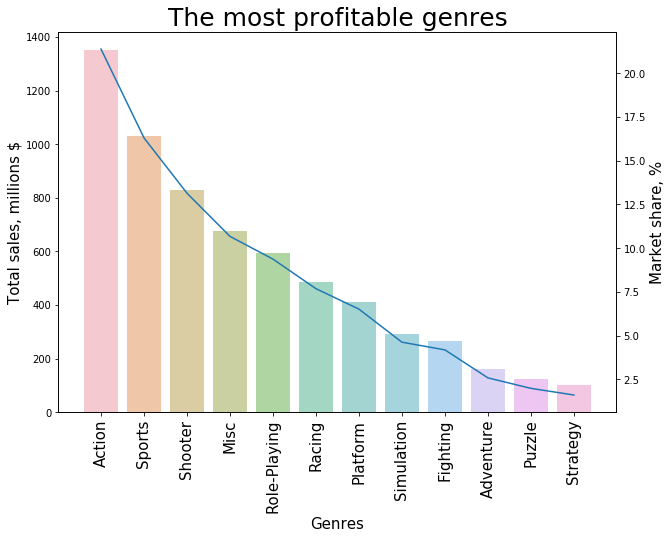

In [123]:
fig, ax1 = plt.subplots(figsize=(10,7))


sns.barplot(data=genres_sales, x='genre', y='total_sales', 
            order=genres_sales_order, alpha=0.5, ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=genres_sales, x='genre', y='market_share', sort=False, dashes=False, ax=ax2)

plt.title('The most profitable genres', fontdict={'size':25})
ax1.set_ylabel('Total sales, millions $', fontdict={'size':15})
ax2.set_ylabel('Market share, %', fontdict={'size':15})
ax1.set_xlabel("Genres", fontdict={'size':15})

ax1.set_xticklabels(genres_sales['genre'], rotation=90, fontdict={'size':15})

#### Conclusion

- We have `Action` genre on the first place with market share 20.55% of games in this genre and market share in total sales - 21.38%. So fifth part of all the games on the market are in `Action` genre and they bring the fifth part of total sales.

- The top 5 genres by sales are `Action` (21.38% of market share), `Sports` (16.30%), `Shooter` (13.14%), `Misc` (10.67%), `Role-Playing` (9.37%)

- The top 5 genres by number of games are `Action` (20.55% of market share), `Sports` (13.57%), `Misc` (11.92%), `Role-Playing` (8.80%), `Adventure` (8.36%). 

- `Shooter` is only 7.81% of market share by number of games and it makes 13.14% of total sales on the market.
- `Adventure` is opposite - it's market share by number of games is 8.36%, but it generates only 2.58% of total sales.

- So we can make conclusion that the most succesful genre is `Shooter` - less different games bring more sales. The most profitable genres are `Action`, `Sports` and `Shooter` with over 3 billions sales together for the last 16 years on the most popular platforms.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>

Indeed here we have popular genre - action but if we calculate revenue per published game that could be not the case. 


## Create a user profile for each region

For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

### Top five platforms

Group `df_games` by `platform` and calculate the sum sales for NA (`na_sales)` for each platform. Sort values by this sum in descending order and reset the index. 

In [124]:
na = df_games.groupby('platform')['na_sales'].sum().reset_index().sort_values(
    by='na_sales', ascending=False).reset_index()

Create a variable `na_top_5` and take only 5 first rows and only `platform` and `na_sales` columns. Use the `loc()` method.

In [125]:
na_top_5 = na.loc[:4, ['platform', 'na_sales']]
na_top_5

platform  na_sales
0     X360    602.47
1      PS2    583.84
2      Wii    496.90
3      PS3    393.49
4       DS    382.40

Calculate the market share of these 5 platforms. Append new column `market_share` to the dataframe `na_top_5`.

In [126]:
na_top_5['market_share'] = round((na['na_sales'] / na['na_sales'].sum()) *100, 2)
na_top_5

platform  na_sales  market_share
0     X360    602.47         13.69
1      PS2    583.84         13.26
2      Wii    496.90         11.29
3      PS3    393.49          8.94
4       DS    382.40          8.69

Make the same steps for EU and JP.

In [127]:
eu = df_games.groupby('platform')['eu_sales'].sum().reset_index().sort_values(
    by='eu_sales', ascending=False).reset_index()

In [128]:
eu_top_5 = eu.loc[:4, ['platform', 'eu_sales']]
eu_top_5

platform  eu_sales
0      PS2    339.29
1      PS3    330.29
2     X360    270.76
3      Wii    262.21
4       PS    213.61

In [129]:
eu_top_5['market_share'] = round((eu['eu_sales'] / eu['eu_sales'].sum()) *100, 2)
eu_top_5

platform  eu_sales  market_share
0      PS2    339.29         13.99
1      PS3    330.29         13.62
2     X360    270.76         11.17
3      Wii    262.21         10.81
4       PS    213.61          8.81

In [130]:
jp = df_games.groupby('platform')['jp_sales'].sum().reset_index().sort_values(
    by='jp_sales', ascending=False).reset_index()

In [131]:
jp_top_5 = jp.loc[:4, ['platform', 'jp_sales']]
jp_top_5

platform  jp_sales
0       DS    175.57
1       PS    139.82
2      PS2    139.20
3     SNES    116.55
4      3DS    100.67

In [132]:
jp_top_5['market_share'] = round((jp['jp_sales'] / jp['jp_sales'].sum()) *100, 2)
jp_top_5

platform  jp_sales  market_share
0       DS    175.57         13.53
1       PS    139.82         10.78
2      PS2    139.20         10.73
3     SNES    116.55          8.98
4      3DS    100.67          7.76

Now we want to merge our 3 dataframes with top 5 platforms for each regions and their market share.
For that create dataframe `data_frames` that include names of our dataframes.

In [133]:
data_frames = [na_top_5, eu_top_5, jp_top_5]

Merge all three dataframes. Use the reduce() function from the library functools with two arguments: function lambda (with arguments - left, right and expression pd.merge()), and sequence - data_frames.

In [134]:
df_merged = reduce(lambda  left,right: pd.merge(
    left,right,on=['platform'], how='outer', suffixes=('_na', '_eu')), data_frames)
df_merged

platform  na_sales  market_share_na  eu_sales  market_share_eu  jp_sales  \
0     X360    602.47            13.69    270.76            11.17       NaN   
1      PS2    583.84            13.26    339.29            13.99    139.20   
2      Wii    496.90            11.29    262.21            10.81       NaN   
3      PS3    393.49             8.94    330.29            13.62       NaN   
4       DS    382.40             8.69       NaN              NaN    175.57   
5       PS       NaN              NaN    213.61             8.81    139.82   
6     SNES       NaN              NaN       NaN              NaN    116.55   
7      3DS       NaN              NaN       NaN              NaN    100.67   

   market_share  
0           NaN  
1         10.73  
2           NaN  
3           NaN  
4         13.53  
5         10.78  
6          8.98  
7          7.76

Make bar plots for every regions sales (`na`, `eu`, `jp` datasets). Set title, x,ylabels, legend. Set xticks equel to `df_merged['platform']` and it's label's size. Make annotation for each bar for each region. For that use `ax.text()` for each region with parameters `x = i` - value of each row in the loop, `y=na_sales+5` (the height of the bar +5), `s=round(na_sales, 1)` - text, `fontsize='large'`, `horizontalalignment='center'`.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


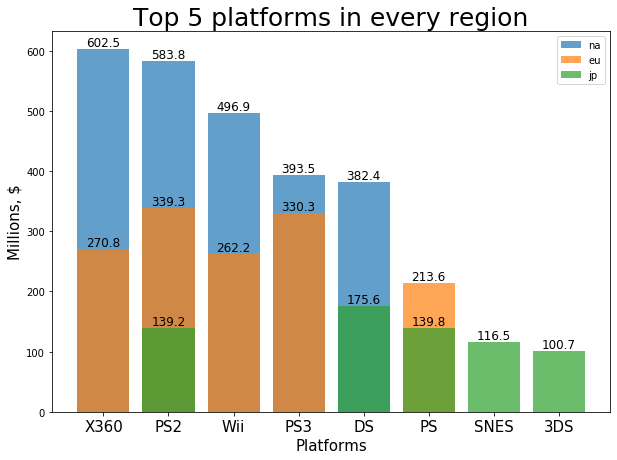

In [135]:
fig, ax = plt.subplots(figsize=(10,7))

na = ax.bar(data=df_merged, x='platform', height='na_sales', alpha =0.7)
eu = ax.bar(data=df_merged, x='platform', height='eu_sales', alpha =0.7)
jp = ax.bar(data=df_merged, x='platform', height='jp_sales', alpha =0.7)

plt.title('Top 5 platforms in every region', fontdict={'size':25})
plt.xlabel("Platforms", fontdict={'size':15})
plt.ylabel("Millions, $", fontdict={'size':15})
plt.xticks('')
ax.legend([na, eu, jp], ['na', 'eu', 'jp'])

ax.set_xticks(df_merged['platform'])
ax.set_xticklabels(df_merged['platform'], fontdict={'size':15})


for i, na_sales in enumerate(df_merged.na_sales):
    ax.text(i, na_sales+5, round(na_sales, 1), fontsize='large', horizontalalignment='center')
    
for i, eu_sales in enumerate(df_merged.eu_sales):
    ax.text(i, eu_sales+5, round(eu_sales, 1), fontsize='large', horizontalalignment='center')
    
for i, jp_sales in enumerate(df_merged.jp_sales):
    ax.text(i, jp_sales+5, round(jp_sales, 1), fontsize='large', horizontalalignment='center')
plt.show()

#### Conclusion

- We see that in North America users bought more games on: 
1. `X360` (602.5 millions, market share 13.69%, between 2005-2016)
2. `PS2` (583.8 millions, market share 13.26%, between 2000-2011)
3. `Wii` (496.9 millions, market share 11.29%, between 2006-2016)
4. `PS3` (393.5 millions, market share 8.94%, between 2006-2016)
5. `DS` (382.4 millions, market share 8.69%, between 2004-2013)

We see that the most successful generation of PS in every regions is `PS2`. In Japan even `PS`, but not the newest generation.

- In Europe users bought more games on: 
1. `PS2` (339.3 millions, market share 13.99%, between 2000-2011)
2. `PS3` (303.3 millions, market share 13.62%, between 2006-2016)
3. `X360` (270.8 millions, market share 11.17%, between 2005-2016)
4. `Wii` (262.2 millions, market share 10.81%, between 2006-2016)
5. `PS` (213.6 millions, market share 8.81%, between 1994-2003)

We see that none of the newest platforms didn't outsell the old version `PS` in Europe and since 2003 didn't removed it from fifth place.

- In Japan users bought more games on: 
1. `DS` (175.6 millions, market share 13.53%, between 2004-2013)
2. `PS` (139.8 millions, market share 10.78%, between 1994-2003)
3. `PS2` (139.2 millions, market share 10.73%, between 2000-2011) `
4. `SNES` (116.5 millions, market share 8.98%, between 1991-2002)
5. `3DS` (100.7 millions, market share 7.76%, between 2011-2016)

We see in the top - three platforms of Nintendo (Japanese company) that had games released from 1991 (`SNES`) and until nowadays (2016 - `3DS`). Only `PS` and `PS2` had big success there.

### Top five genres

Make the same steps for Top 5 genres.

In [136]:
na_genres = df_games.groupby('genre')['na_sales'].sum().reset_index().sort_values(
    by='na_sales', ascending=False).reset_index()

In [137]:
na_top_5_genres = na_genres.loc[:4, ['genre', 'na_sales']]
na_top_5_genres

genre  na_sales
0    Action    879.01
1    Sports    684.43
2   Shooter    592.24
3  Platform    445.50
4      Misc    407.27

In [138]:
na_top_5_genres['market_share'] = round((
    na_genres['na_sales'] / na_genres['na_sales'].sum()) *100, 2)
na_top_5_genres

genre  na_sales  market_share
0    Action    879.01         19.97
1    Sports    684.43         15.55
2   Shooter    592.24         13.46
3  Platform    445.50         10.12
4      Misc    407.27          9.25

In [139]:
eu_genres = df_games.groupby('genre')['eu_sales'].sum().reset_index().sort_values(
    by='eu_sales', ascending=False).reset_index()

In [140]:
eu_top_5_genres = eu_genres.loc[:4, ['genre', 'eu_sales']]
eu_top_5_genres

genre  eu_sales
0   Action    519.13
1   Sports    376.79
2  Shooter    317.34
3   Racing    236.51
4     Misc    212.74

In [141]:
eu_top_5_genres['market_share'] = round((
    eu_genres['eu_sales'] / eu_genres['eu_sales'].sum()) *100, 2)
eu_top_5_genres

genre  eu_sales  market_share
0   Action    519.13         21.42
1   Sports    376.79         15.54
2  Shooter    317.34         13.09
3   Racing    236.51          9.76
4     Misc    212.74          8.78

In [142]:
jp_genres = df_games.groupby('genre')['jp_sales'].sum().reset_index().sort_values(
    by='jp_sales', ascending=False).reset_index()

In [143]:
jp_top_5_genres = jp_genres.loc[:4, ['genre', 'jp_sales']]
jp_top_5_genres

genre  jp_sales
0  Role-Playing    355.41
1        Action    161.43
2        Sports    135.54
3      Platform    130.83
4          Misc    108.11

In [144]:
jp_top_5_genres['market_share'] = round((
    jp_genres['jp_sales'] / jp_genres['jp_sales'].sum()) *100, 2)
jp_top_5_genres

genre  jp_sales  market_share
0  Role-Playing    355.41         27.40
1        Action    161.43         12.44
2        Sports    135.54         10.45
3      Platform    130.83         10.08
4          Misc    108.11          8.33

In [145]:
data_frames_genres = [na_top_5_genres, eu_top_5_genres, jp_top_5_genres]
df_merged_genres = reduce(lambda  left,right: pd.merge(
    left,right,on=['genre'], how='outer', suffixes=('_na', '_eu')), data_frames_genres)

In [146]:
df_merged_genres

genre  na_sales  market_share_na  eu_sales  market_share_eu  \
0        Action    879.01            19.97    519.13            21.42   
1        Sports    684.43            15.55    376.79            15.54   
2       Shooter    592.24            13.46    317.34            13.09   
3      Platform    445.50            10.12       NaN              NaN   
4          Misc    407.27             9.25    212.74             8.78   
5        Racing       NaN              NaN    236.51             9.76   
6  Role-Playing       NaN              NaN       NaN              NaN   

   jp_sales  market_share  
0    161.43         12.44  
1    135.54         10.45  
2       NaN           NaN  
3    130.83         10.08  
4    108.11          8.33  
5       NaN           NaN  
6    355.41         27.40

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


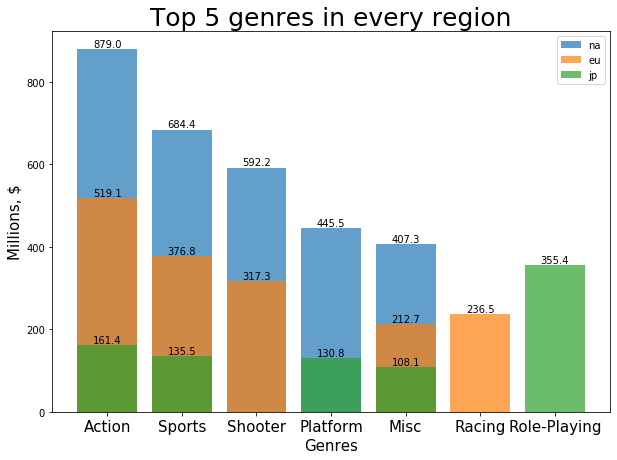

In [147]:
fig, ax = plt.subplots(figsize=(10,7))

na = ax.bar(data=df_merged_genres, x='genre', height='na_sales', alpha =0.7)
eu = ax.bar(data=df_merged_genres, x='genre', height='eu_sales', alpha =0.7)
jp = ax.bar(data=df_merged_genres, x='genre', height='jp_sales', alpha =0.7)

plt.title('Top 5 genres in every region', fontdict={'size':25})
plt.xlabel("Genres", fontdict={'size':15})
plt.ylabel("Millions, $", fontdict={'size':15})
plt.xticks('')
ax.legend([na, eu, jp], ['na', 'eu', 'jp'], loc=1)

ax.set_xticks(df_merged_genres['genre'])
ax.set_xticklabels(df_merged_genres['genre'], fontdict={'size':15})


for i, na_sales in enumerate(df_merged_genres.na_sales):
    ax.text(i, na_sales+5, round(na_sales, 1), horizontalalignment='center')
    
for i, eu_sales in enumerate(df_merged_genres.eu_sales):
    ax.text(i, eu_sales+5, round(eu_sales, 1), horizontalalignment='center')
    
for i, jp_sales in enumerate(df_merged_genres.jp_sales):
    ax.text(i, jp_sales+5, round(jp_sales, 1), horizontalalignment='center')
plt.show()

#### Conclusion

- We see that in North America users bought more games of such genres as: 
1. `Action` (879 millions, market share 19.97%)
2. `Sports` (684.4 millions, market share 15.55%)
3. `Shooter` (592.2 millions, market share 13.46%)
4. `Platform` (445.5 millions, market share 10.12%)
5. `Misc` (407.3 millions, market share 9.25%)

Users in NA the most like `Action`.

- We see that in Europe users bought more games of such genres as:
1. `Action` (519 millions, market share 21.42%)
2. `Sports` (376.8 millions, market share 15.54%)
3. `Shooter` (317.3 millions, market share 13.09%)
4. `Racing` (236.5 millions, market share 9.76%)
5. `Misc` (212.7 millions, market share 8.78%)

Users in EU have the same list of genres. Only instead of `Paltforms` they chose `Racing` on the fourth place.

- We see that in Japan users bought more games of such genres as:
1. `Role-Playing` (355.4 millions, market share 27.4%) 
2. `Action` (161.4 millions, market share 12.44%)
3. `Sports` (135.5 millions, market share 10.45%)
4. `Platform` (130.8 millions, market share 10.08%)
5. `Misc` (108.1 millions, market share8.33%)

Users in JP the most like `Role-Playing` games - over 27% of market. They don't like `Shooters` so much - it isn't in the top 5. Other genres in the list are the same genres as in NA. Now we know hwo played big part in getting `Role-Playing` genre into top 5 genres overall in the world by sales (got this information in 3.7.1 Conclusion).

### ESRB ratings

Make the same steps to get for each region ESRB rating's sales.

In [148]:
na_rating = df_games.groupby('rating')['na_sales'].sum().reset_index().sort_values(
    by='na_sales', ascending=False)
na_rating

rating  na_sales
5  everyone   1295.55
6   unknown   1242.46
1       13+    759.75
2       17+    748.48
0       10+    353.32
4        3+      1.53
3       18+      1.26

<div class="alert alert-info"> <b>Student comments:</b> </div>

In [149]:
na_rating['market_share'] = round((
    na_rating['na_sales'] / na_rating['na_sales'].sum()) *100, 2)
na_rating

rating  na_sales  market_share
5  everyone   1295.55         29.43
6   unknown   1242.46         28.22
1       13+    759.75         17.26
2       17+    748.48         17.00
0       10+    353.32          8.03
4        3+      1.53          0.03
3       18+      1.26          0.03

In [150]:
eu_rating = df_games.groupby('rating')['eu_sales'].sum().reset_index().sort_values(
    by='eu_sales', ascending=False)
eu_rating

rating  eu_sales
5  everyone    710.52
6   unknown    613.91
2       17+    483.97
1       13+    427.03
0       10+    188.52
3       18+      0.61
4        3+      0.11

<div class="alert alert-info"> <b>Student comments:</b> </div>

In [151]:
eu_rating['market_share'] = round((
    eu_rating['eu_sales'] / eu_rating['eu_sales'].sum()) *100, 2)
eu_rating

rating  eu_sales  market_share
5  everyone    710.52         29.30
6   unknown    613.91         25.32
2       17+    483.97         19.96
1       13+    427.03         17.61
0       10+    188.52          7.78
3       18+      0.61          0.03
4        3+      0.11          0.00

In [152]:
jp_rating = df_games.groupby('rating')['jp_sales'].sum().reset_index().sort_values(
    by='jp_sales', ascending=False)
jp_rating

rating  jp_sales
6   unknown    841.96
5  everyone    199.57
1       13+    151.40
2       17+     64.24
0       10+     40.20
3       18+      0.00
4        3+      0.00

<div class="alert alert-info"> <b>Student comments:</b> </div>

In [153]:
jp_rating['market_share'] = round((
    jp_rating['jp_sales'] / jp_rating['jp_sales'].sum()) *100, 2)
jp_rating

rating  jp_sales  market_share
6   unknown    841.96         64.90
5  everyone    199.57         15.38
1       13+    151.40         11.67
2       17+     64.24          4.95
0       10+     40.20          3.10
3       18+      0.00          0.00
4        3+      0.00          0.00

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>

Thanks for adding N/A rating.  

In [154]:
data_frames = [na_rating, eu_rating, jp_rating]

In [155]:
df_merged_ratings = reduce(lambda  left,right: pd.merge(
    left,right,on=['rating'], how='outer', suffixes=('_na', '_eu')), data_frames)
df_merged_ratings

rating  na_sales  market_share_na  eu_sales  market_share_eu  jp_sales  \
0  everyone   1295.55            29.43    710.52            29.30    199.57   
1   unknown   1242.46            28.22    613.91            25.32    841.96   
2       13+    759.75            17.26    427.03            17.61    151.40   
3       17+    748.48            17.00    483.97            19.96     64.24   
4       10+    353.32             8.03    188.52             7.78     40.20   
5        3+      1.53             0.03      0.11             0.00      0.00   
6       18+      1.26             0.03      0.61             0.03      0.00   

   market_share  
0         15.38  
1         64.90  
2         11.67  
3          4.95  
4          3.10  
5          0.00  
6          0.00

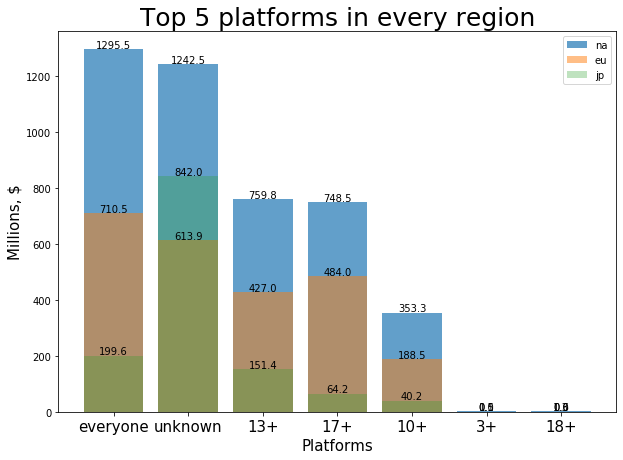

In [156]:
fig, ax = plt.subplots(figsize=(10,7))

na = ax.bar(data=df_merged_ratings, x='rating', height='na_sales', alpha =0.7)
eu = ax.bar(data=df_merged_ratings, x='rating', height='eu_sales', alpha =0.5)
jp = ax.bar(data=df_merged_ratings, x='rating', height='jp_sales', alpha =0.3)

plt.title('Top 5 platforms in every region', fontdict={'size':25})
plt.xlabel("Platforms", fontdict={'size':15})
plt.ylabel("Millions, $", fontdict={'size':15})
plt.xticks('')
ax.legend([na, eu, jp], ['na', 'eu', 'jp'])

ax.set_xticks(df_merged_ratings['rating'])
ax.set_xticklabels(df_merged_ratings['rating'], fontdict={'size':15})


for i, na_sales in enumerate(df_merged_ratings.na_sales):
    ax.text(i, na_sales+5, round(na_sales, 1), horizontalalignment='center')
    
for i, eu_sales in enumerate(df_merged_ratings.eu_sales):
    ax.text(i, eu_sales+5, round(eu_sales, 1), horizontalalignment='center')
    
for i, jp_sales in enumerate(df_merged_ratings.jp_sales):
    ax.text(i, jp_sales+5, round(jp_sales, 1), horizontalalignment='center')
plt.show()

In [157]:
number_of_games_per_rating = df_games.groupby('rating')['name'].count().reset_index().sort_values(
    by='name', ascending=False)
number_of_games_per_rating

rating  name
6   unknown  6767
5  everyone  3993
1       13+  2961
2       17+  1563
0       10+  1420
4        3+     8
3       18+     1

#### Conclusion 

We have leader in sales in every region - it's games for Everyone. Because they have more wide target group and studios create more games at all for Everyone (3993 games). Also games for `13+` and `17+` are popular because teenagers and adults can play it. And it's the major consumers of games. In Japan a lot of sales did games with unknown rating (64.9%), so we can't say exactly if our analysis is true. In Europe games with rating `17+` did more money than `13+` and in North America vice verse.

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Great! Almost everything is correct here.
I really like stacked barcharts. It provides a nice overview of all data. 
Another way could be to create groupped pie charts using subplots.
    
One small comment regarding market shares by rating. It could be also helpful to understand proportion of unrated games per region, as this is quite an interesting information, especially for JP region.

## Test the hypotheses

### Average user ratings of the Xbox One and PC platforms are the same.

Let's check average user scores for Xbox One and PC platforms. Use the `query()` and the `agg()` methods to calculate mean.  

In [158]:
XOne_user_score_mean = df_games.query('platform == "XOne"')['user_score_full'].agg('mean')
XOne_user_score_mean

6.709716599190284

In [159]:
XOne_user_score_mean = df_games.query('platform == "PC"')['user_score_full'].agg('mean')
XOne_user_score_mean

7.1266940451745375

We see that they are different. But the difference is small. We want to prove statistically that user scores for Xbox One and PC platforms are the same. 
Is the difference between these numbers significant? Until we carry out the correct test, we can’t say that the difference between the means is random, and we also can't say that the difference is large enough to posit that mean user scores between the two populations (for XOne and PC) does indeed vary (i.e. that the difference is significant). That depends on the variance of the samples the values are calculated from. Instead of basing our comparison on the averages alone, use the datasets to perform a statistical test.

Set two datasets from `df_games`. One for `XOne`, second for `PC`. Use the query() method.

In [160]:
sample1 = df_games.query('platform == "XOne"')['user_score_full']
sample1.head()

99     7.5
165    7.9
179    5.4
242    6.4
270    6.2
Name: user_score_full, dtype: float64

In [161]:
sample2 = df_games.query('platform == "PC"')['user_score_full']
sample2.head()

85     7.6
138    7.3
192    4.0
195    7.4
218    8.2
Name: user_score_full, dtype: float64

**Formulate the null hypothesis**: let's say that the average user scores for games on `XOne` and `PC` are the same, i.e. there's no difference between two populations.

**Formulate the alternative hypothesis:** there is significant difference between the average user scores for games on `XOne` and `PC`.

In order to test the null hypothesis that the means of the two statistical populations are equal based on samples taken from them, apply the method **scipy.stats.ttest_ind(array1, array2, equal_var)**.
We pass these parameters to the method:  
* `array1`, `array2` are arrays containing the samples  
* `equal_var` (from equal variance) is a parameter that specifies whether or not the variances of the populations should be considered equal. It's passed as `equal_var = True` or `equal_var = False` (True means we consider the variances equal, False means we don't).

We can carry out levene test to check if variances of two samples are equal or not.

Apply the `scipy.stats.levene(array1, array2)`. Assign it to p_value_levene variable and compare it with alpha. Set **alpha =0.05 (critical statistical significance level - if the p-value is less than alpha, we reject the hypothesis).** If it's less than alpha we reject the null hypothesis that variances of samples are equal.

In [162]:
alpha = 0.05

In [163]:
p_value_levene = st.levene(sample1, sample2).pvalue
if p_value_levene < alpha:
    print('Reject the null hypothesis: variances of samples is not equal')
else:
    print("Fail to Reject the null hypothesis: We don't have enough evidence to say that" +
          " variances of samples are not the same")

Fail to Reject the null hypothesis: We don't have enough evidence to say that variances of samples are not the same


Let's test the hypothesis that the means of the two independent populations are equal. Use the method **ttest_ind** from the `scipy.stats` package to test the hypothesis.   

Write function to carry out our test. Make levene test inside the function. It will set `equal_var = option_var`, that equels False if `p_value_levene < alpha`, else it will set `option_var=True`. Compare the p_value with the significance level (alpha). If it's less than alpha we reject the null hypothesis.

In [164]:
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene = st.levene(sample1, sample2).pvalue
    if p_value_levene < alpha:
        option_var = False
    else:
        option_var = True
    print('p_value_levene is', p_value_levene, 'so option_var is', option_var)    
    
    p_value = st.ttest_ind(sample1, sample2, equal_var = option_var).pvalue
    print('p_value is', p_value)
    
    if p_value < alpha:
        print('Reject the null hypothesis: averages of samples is not equal')
    else:
        print( "Fail to Reject the null hypothesis: We don't have enough evidence" +
              " to say that averages of samples are not the same")

Conduct the test.

In [165]:
t_test(sample1,sample2,alpha=0.05)

p_value_levene is 0.190467798030614 so option_var is True
p_value is 1.4349731097898817e-05
Reject the null hypothesis: averages of samples is not equal


#### Conclusion

We reject the null hypothesis that the average user scores for `XOne` and `PC` are the same. The p-value tells us that there is very small probability of randomly getting a difference that size or larger (i.e. it's very small probability that user scores are equel). So we can say that there is significant difference between the average user scores for `XOne` and `PC`.

### Average user ratings for the Action and Sports genres are different.

Test second hypotheses. Let's check average user scores for `Action` and `Sports` genres. Use the `query()` and the `agg()` methods to calculate mean.  

In [166]:
action_user_score_mean = df_games.query('genre == "Action"')['user_score_full'].agg('mean')
action_user_score_mean

7.044968833481746

In [167]:
sports_user_score_mean = df_games.query('genre == "Sports"')['user_score_full'].agg('mean')
sports_user_score_mean

7.189097103918228

We see that they are almost the same. We want to prove statistically that user scores for `Action` and `Sports` genres are different. 

Set two datasets from `df_games`. One for `Action`, second for `Sports`. Use the query() method.

In [168]:
sample3 = df_games.query('genre == "Action"')['user_score_full']
sample3.head()

16    8.2
17    9.0
23    8.1
24    8.7
38    8.5
Name: user_score_full, dtype: float64

In [169]:
sample4 = df_games.query('genre == "Sports"')['user_score_full']
sample4.head()

0     8.0
3     8.0
13    7.7
15    7.4
77    4.3
Name: user_score_full, dtype: float64

**Formulate the null hypothesis**: let's say that the average user scores for `Action` and `Sports` genres are the same, i.e. there's no difference between two populations.

**Formulate the alternative hypothesis:** there is significant difference between the average user scores for `Action` and `Sports` genres.

Run the test using our function t_test.

In [170]:
t_test(sample3, sample4, alpha=0.05)

p_value_levene is 0.417882053591893 so option_var is True
p_value is 1.5246902053818206e-06
Reject the null hypothesis: averages of samples is not equal


#### Conclusion

We reject the null hypothesis that the average user scores for `Action` and `Sports` genres are the same.  

The p-value told us that there is very small probability of randomly getting a difference that size. This probability is clearly too small to conclude that average user scores for `Action` and `Sports` genres are the same.

So, in other words, we can say that there is significant difference between the average user scores for `Action` and `Sports` genres.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
- Overall you did a perfect job! Hypotheses have been formulated and tested correctly. 
- Great that you additionally checked data that has been used for the test and conducted Levene test to check variance.
- Great that you created a function to automate repetitive steps.
   


## General conclusion

We imported all neсessary libraries. Read and opened our dataframe. Looked at general features.

- We have games released from 1980 to 2016, but more new games because medium year is 2007.
- There 11559 unique game's names from 16715 rows.
- From all over 16000 games the most games were on PS2 - 2161.
- The most frequent genre of games is action - 3369.

- Changed data type of some columns that had dates to datetime type. Optimized memory usage of dataframes.  
- Checked dataframe for missing values and filled in missing values:
    - In `year_of_release` we dropped missing values.
    - In `critic_score` we filled in missing values with median `critic_score` for different genres.
    - In `user_score` we filled in missing values with mean `user_score` for different `critic_score_full_3`.
    - In `rating` we left missing values as it is.


- Checked for duplicates.
- Replaced abbreviation of ESRB rating with it's description.

Calculated total sales for every game. In the first 5 games by sales - 3 were released on the `Wii` platform.

**Analyzed the data**  

**Looked at how many games were released in different years.**

We saw an increase in the number of games released each year from the 1994 (from 60 in previous years to 121 in 1994), accelerated in growth after 2002 (829 new games) and reached its peak in 2008-2009 (1427 - 1426 new games released per year). Last years it fell to 502 new games. It might be because a lot of people still play their favorite games series from previous years and companies only remaster these games or release new  one from series. And a lot of games 'fade in the history'. It were years with a lot of games studios and now it's probably a few big monopolistic studios.

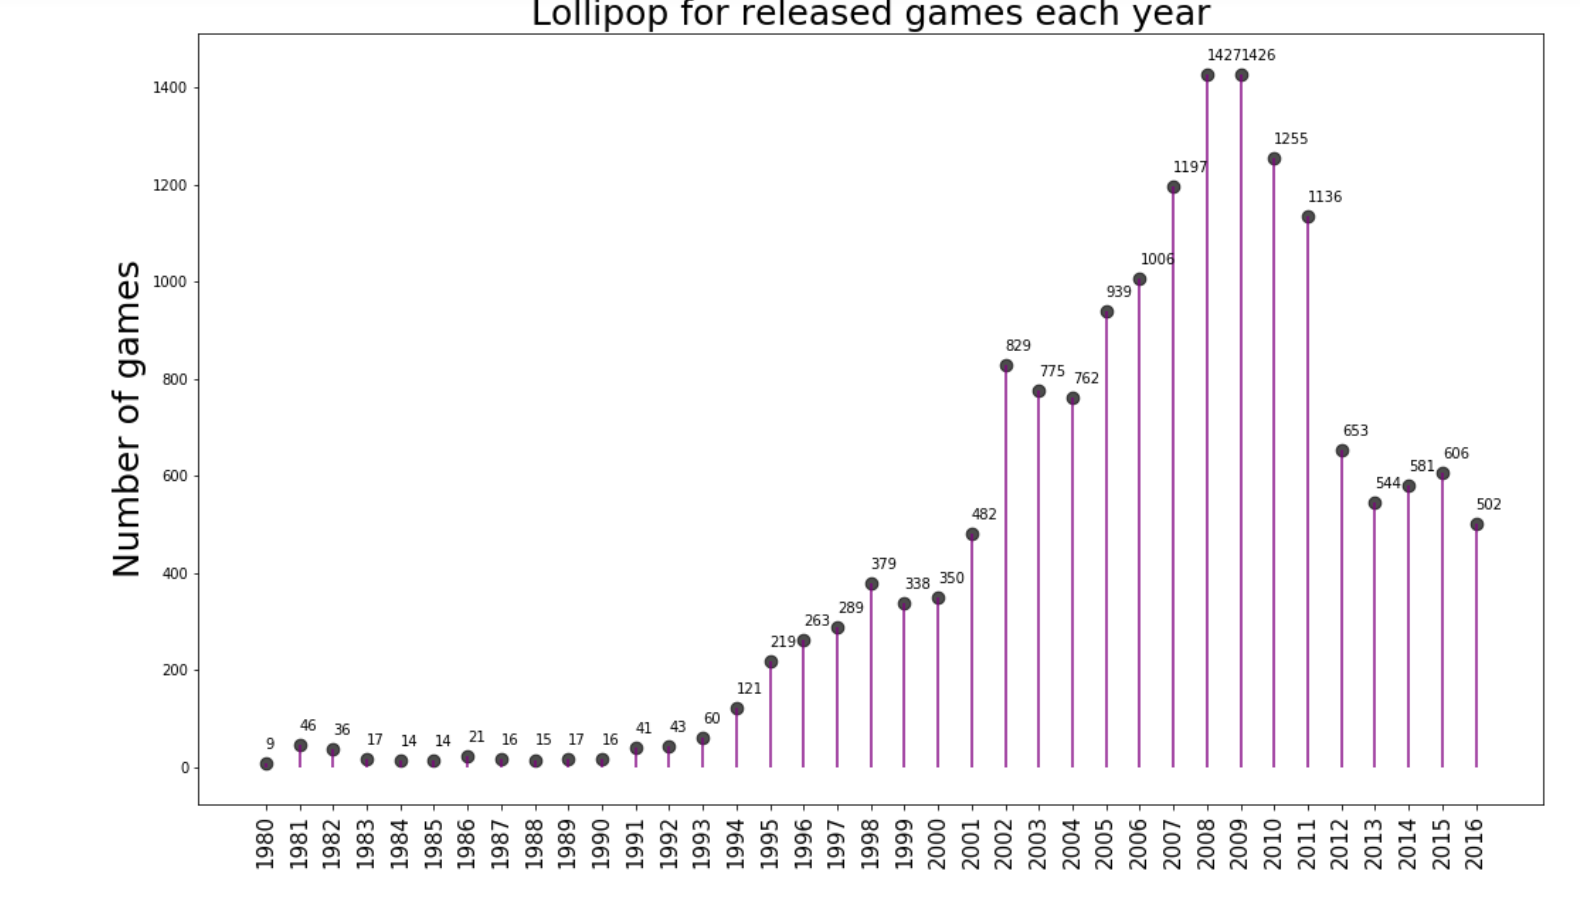

**Looked at how sales varied from platform to platform.**

- `PS2` has the highest total sales for all it's existence (1,255 billions dollars). Next goes `X360` with 971.42 millions, `PS3` (939.65 millions), Wii (907.51 millions) and `DS` (806.12 millions).
- While `PS2` was at first place by number of games released on it (2161 games - 12.93%), `DS` -second place (12.87%), `PS3` - third place (7.96%), `Wii` (7.90%) and `X360` (7.55%). So the top 5 platforms are the same here, but `DS` with more games share on the market (by 5.33%) had less total sales than `X360` (by 165.3 millions) despite the fact that the platforms released at the same time in 2005.


- Built diverging barplot.  
Learnt that the most profitable platforms are the platforms that were released in 00's. Chose them for the analysis (PSP, PS4, GBA, PS, DS, Wii, PS3, X360, PS2). Their total sales bigger than the mean of the total sales and lies in the range from 1 to 3 standard deviations.

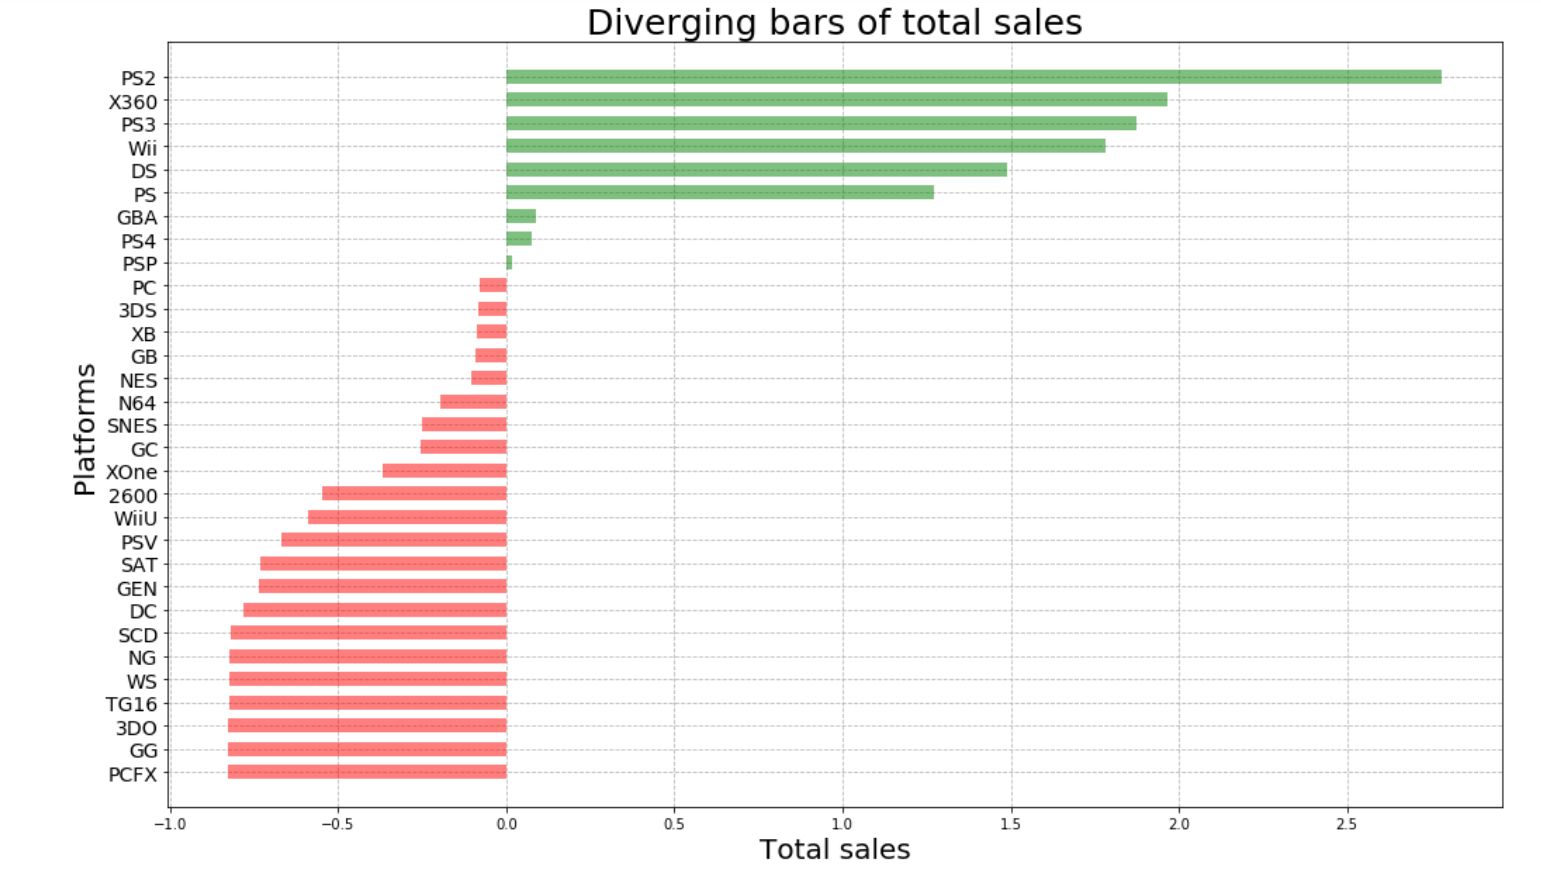

**Built a distribution based on the chosen platforms for each year**

Used lineplot from seaborn library to show the lifetime cycles of each platform.

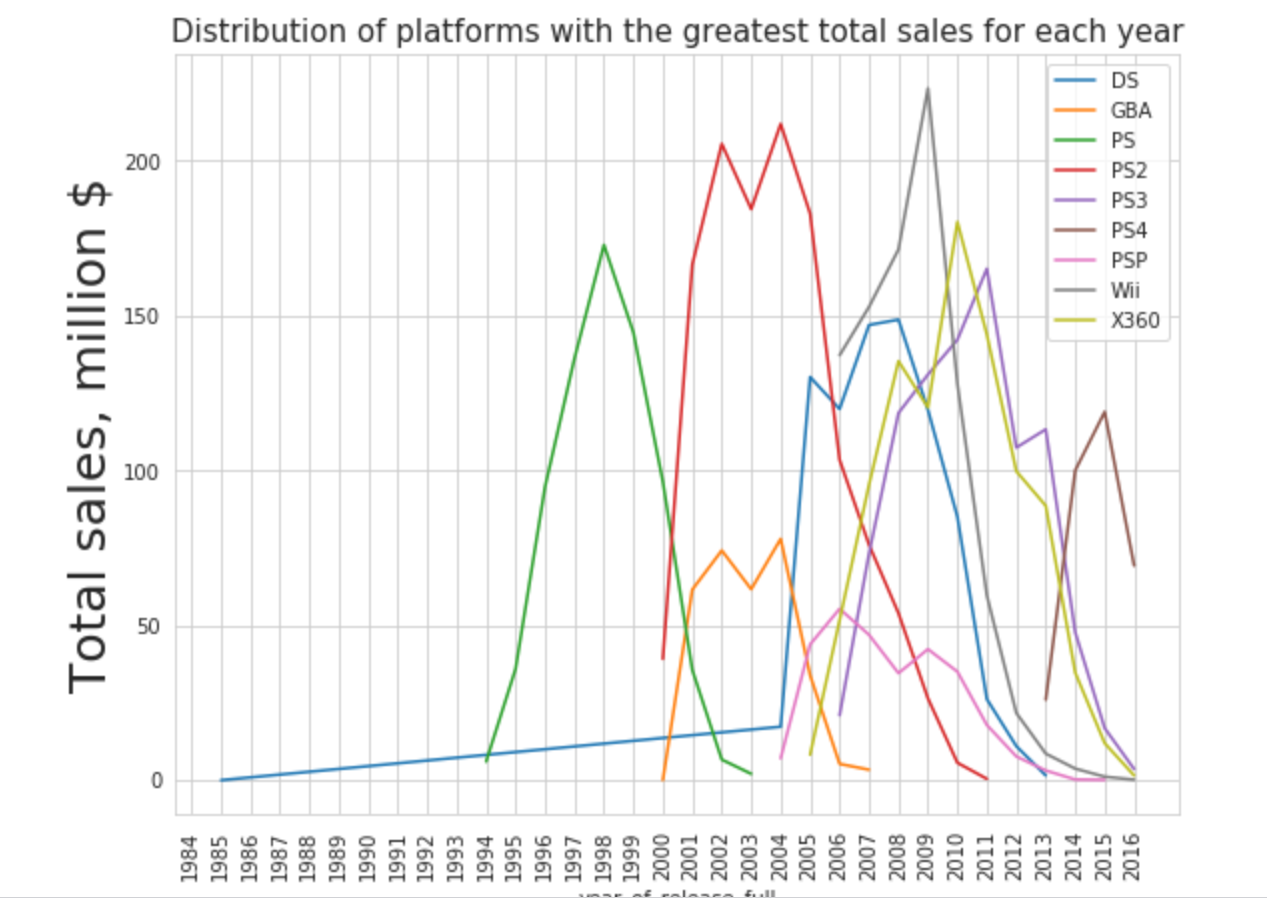

Top discoveries from this graph :
- `PS2` first released games in 2000 (right before PS fade) and finished in 2011 with peak sales between 2002 and 2004.
- `PS3` first released games in 2006 and finished in 2016 with peak sales in 2011 (when it became most popular PS2 became unrelevant).
- `PS4` first released games in 2013 and with peak sales in 2015 and it's steal popular because there isn't new version of PS. It can be popular 4-5 years more until PS5 will be released (approximately in 2020 - every 6 years appears new PS platform). According to previous statistic - every PS existed in average 10 years.  


- `Wii` from Nintendo first released games in 2006 (started with huge sales first year - almost 150 millions dollars that was the record) and beated the all time record with peak sales of games on this platform in 2009 above 220 millions dollars. But sales fell sharply and after 2012 (when released Wii U). And finished to release games on this platform in 2016. Also it took 10 years for platform to exist with peak in the middle of period or even on the first 3 years.


- `DS` (next portable Game Boy from Nintendo) first released games in 2004 (after break almost 20 years -appears that it had the same name in 1985) and finished in 2013 with peak sales between 2005 and 2009. It had better sales than PSP (better than every portable platform, almost on the same level with main platforms and it was successful in the same time with 'big brother' Wii).


- `X360` first released games in 2005 and finished in 2015 with peak sales in 2010.

The 9 most popular platforms of all times released their games from 1994 (only PS), mostly from 2000 and 2004. Every platform had 10-years cycle - appears, peak sales and fades.
As we saw from the lollipop graph peak of number of games released each year was between 2002 and 2011. After this period new released platforms didn't have such number of new games released and so high total sales like it was previous years.

Also we see that X360 and PS3 appeared in 2005 and 2006 and have identical form of the graph and the same direction in the same years. So they grew and fell simultaneously in the same period. But new PS4 already had better success (next Xbox - XOne was released in the same 2013, but didn't have the same sales).

Wii from Nintendo had great success fast and fell as fast. Despite being released at the same time as `PS3` and `X360`. And next `WiiU`, also as next `XOne` didn't have the same success.

Our conclusion that the most popular and the most profitable platforms are PS, Xbox and Wii. But PS3, X360 and Wii already old versions and new games don't release for them. We can look at their new version in our prognosis - `PS4`, `XOne` and `WiiU`, but the leader among them is `PS4`.

**Determined the period for analysis - from 2000 year.**   
We should take the period when the growth of games production started and when the most successful platforms appeared (PS2). So let's take the data from 2000.

**Described platforms-leaders in sales**  
Built the heatmap to see how total sales changed YoY.

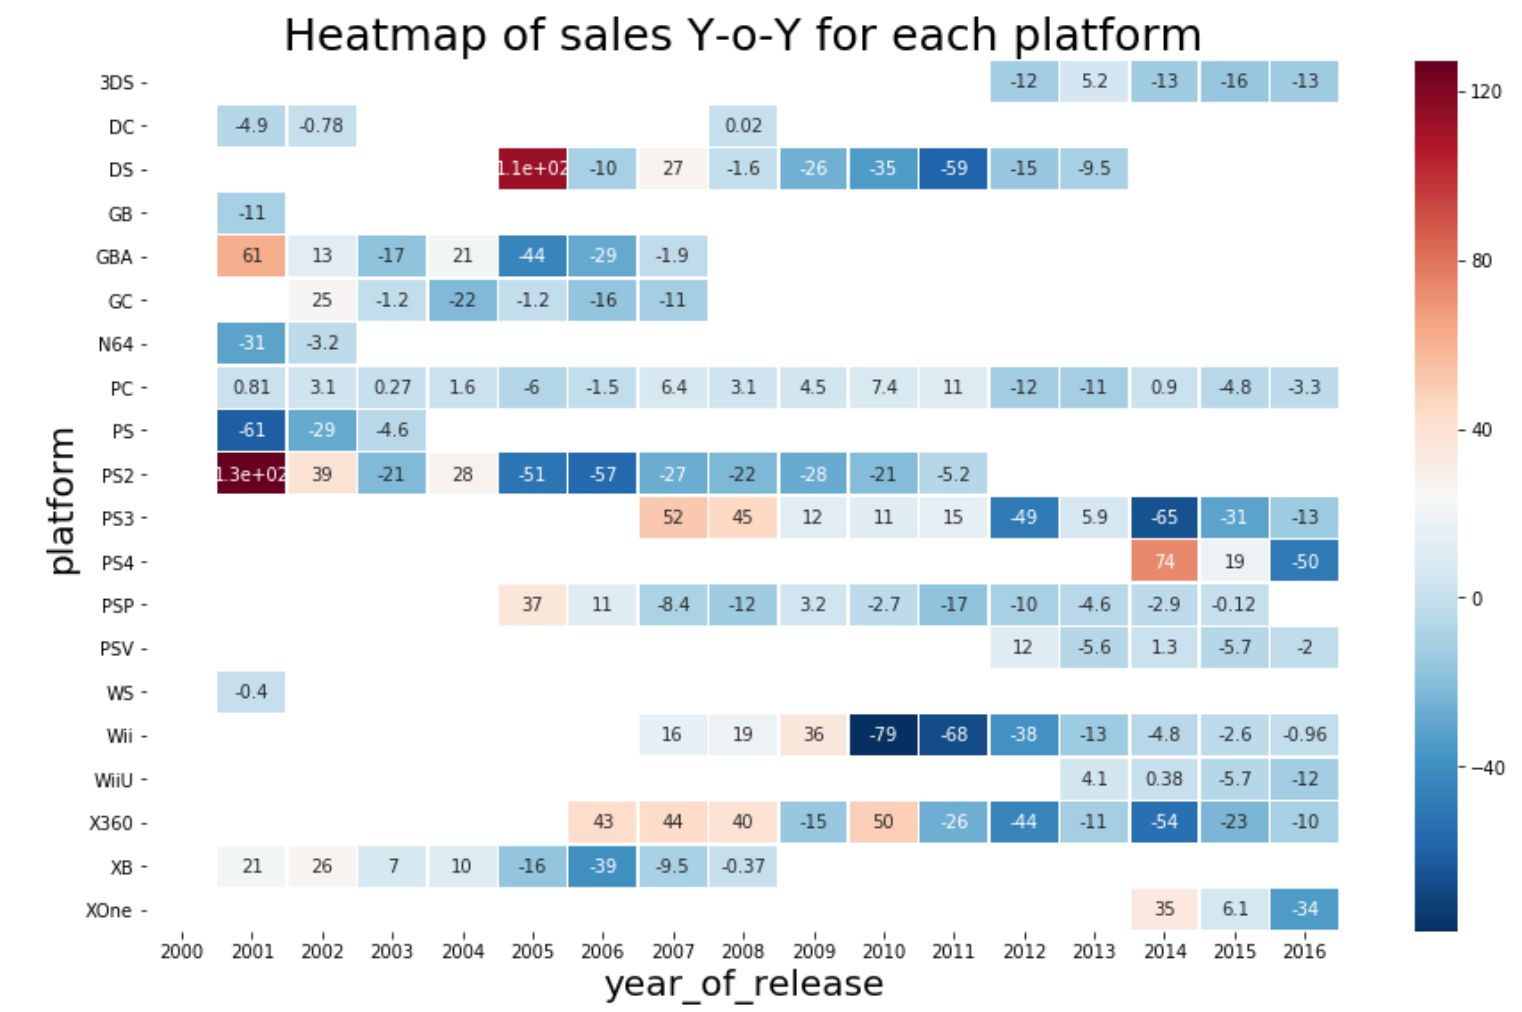

- PS2: in 2001 it's huge sales growth comparing with 2000 (over 130 millions growth - probably because it was first full year of that platform and game studios create new games for it). After that in 2002 it grew but only by 39 millions and it stood on the peaks untill 2005, and had big reduction in 2006 (-57 millions) and slowly decreased next years (between -27 to -5.2 millions every year lost)
- PS3: it had been grown fast in 2007 (+52 millions) comparing with the year of release (2006) and also in 2008 (+45 millions). After that - 3 years of slightly growth (+11-15 millions each year) and reduction after 2012 (-49, -65, -31, -13 millions every year had lost).
- PS4: huge growth camparing with first year in 2014 (+74 millions) and growth in 2015 (+19 millions) and big drop in 2016 (-50 millions that's almost the half of previous years growth, maybe there is not full data for sales in the last quarters of 2016). 


- Wii: it started from the high point of sales, so we don't see huge growth here in first years (+16, +19, +36 millions) but we can see dramatically fast drop in 2010, 2011 and 2012 (-79, -68, -38 millions accordingly)


- X360: we see alomost five years in the row of growth from 2006 to 2010 (+43, +44, +40, only here -15 and +50 millions). Games on that platform could keep gamers and keep sales growth long time (probably kept to release a lot of games) and had slow reduction (-26, -44, -11, -54, -23, 10 millions) next years. That good results. That's the reason why X360 has second place in the total sales for all years after PS2


- One point that we have on the heatmap and don't have on the lineplot above - are the platforms that hadn't been in the top 9 platforms (because we choose here every platform that had sales after 2000). So we can compare such platforms here as XOne, WiiU and PS4 (only which had been in the top). And wee see very slow growth of WiiU (+4.1, +0.38 millions) and -5.7, -12 millions reduction last years. While PS4 had much bigger growth of sales and bigger sales at all. And XOne was better than WiiU (+35, +6.1 but -34 millions last year).

**Also built the distribution of number of games on each platform.**

- We see that a lot of games were released on the `DS` platform from 2007 to 2010 that contributed to it's total sales in these years. They released on the `DS` more games than on the other platforms. But it didn't help them to make more sales than others.
- All the platforms are shrinking now even the new generation `WiiU`. But we might not have full data for the last year.
- Only 3 platforms are growing - `PS4`, `XOne` and `PC` (after drop in the number of games started to grow YoY).
- `PS3` still has some games released, `X360`, `WiiU`, but others 'died'.
- We can consider to the next year prognosis only games released on `PS4`, `XOne` and `PC`.

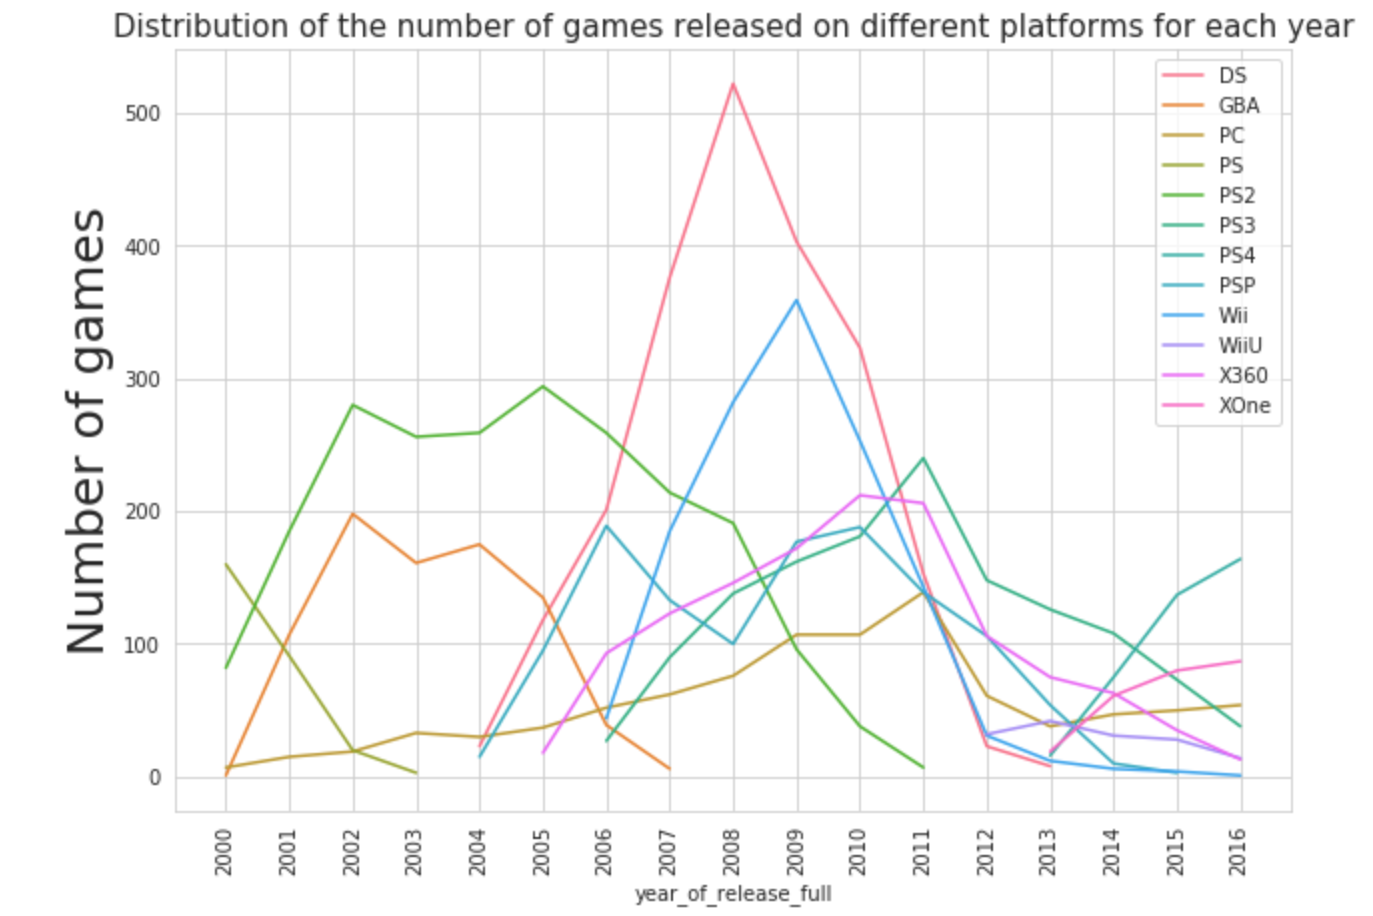

**Built a box plot for the global sales of all games, broken down by platform.**

- We see that difference in sales are significant.
- `PS2` and `Wii` have the wide range of total sales in different years (from almost zero to over 200 millions), but `PS2` have higher medians sales (89.7 millions) against 59.65 millions of `Wii`.
- `Wii` had higher sales some years than `PS2`, but in general it was more weak years, so the median sales are lower.
- `PS4` has small range, but higher sales, so medians sales are high - 84.62 (but it's only because this platform is new and it didn't start fade, and didn't fall to zero sales). The same `XOne` and `WiiU`. But they have lower sales.
- All the platforms that are shrinking have next to zero or zero values.

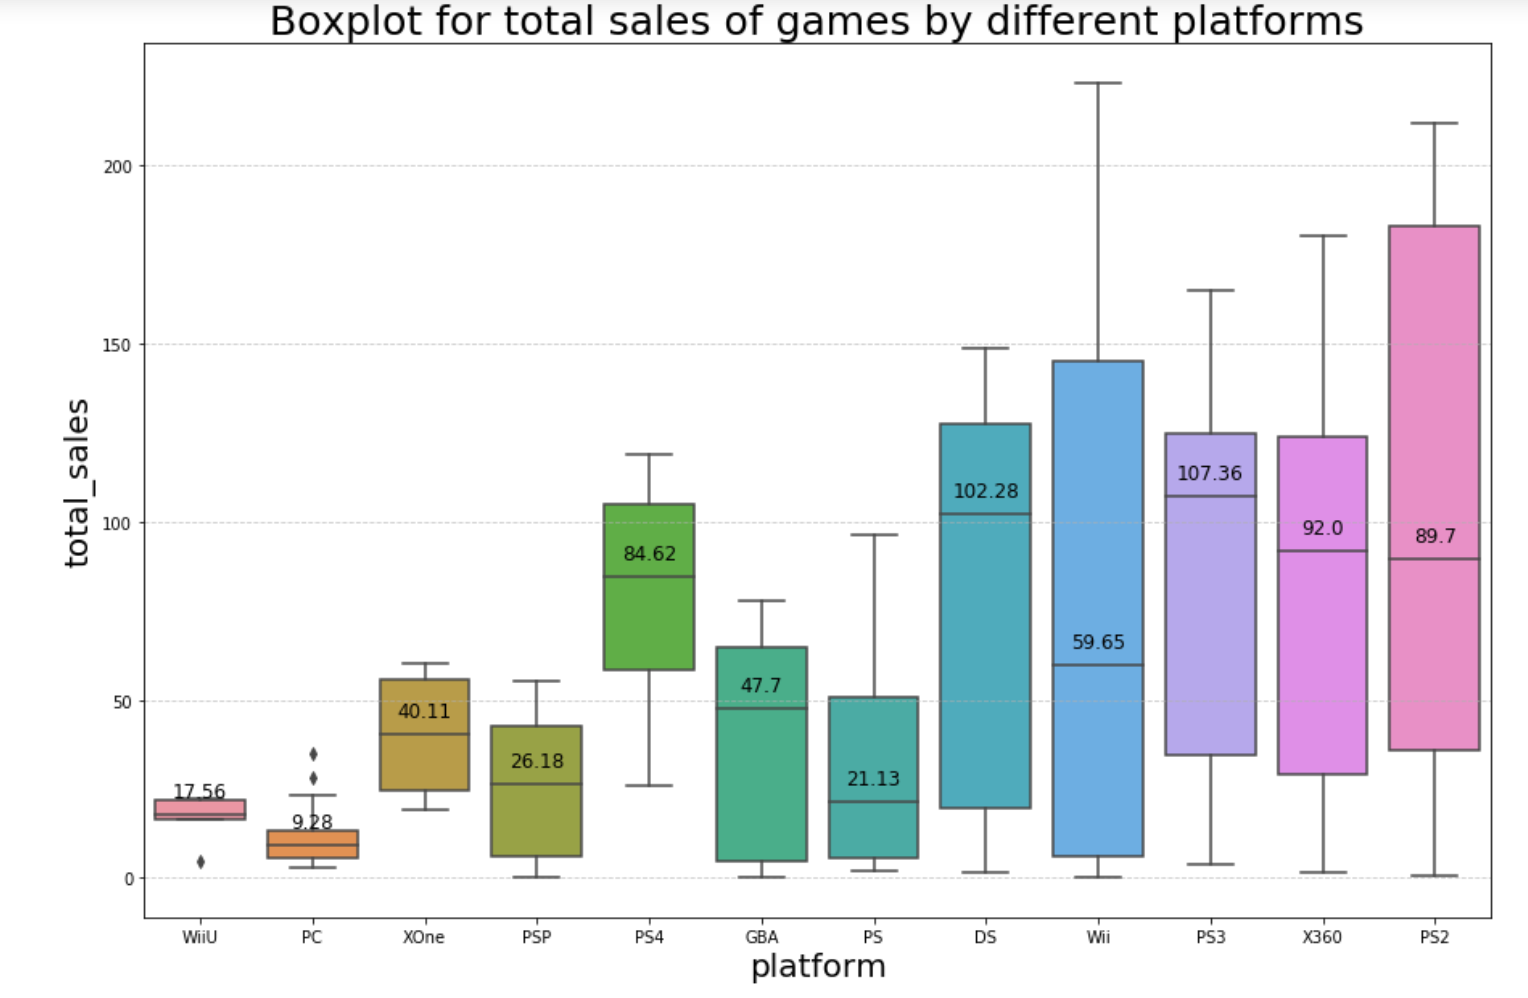

**Looked at how user and professional reviews affect sales for one popular platform. Built a scatter plot and calculate the correlation between reviews and sales.**

- We don't see high correlation between reviews and total sales. For some games sales were big enough and it had high review scores. But for other games with high score it had both high and low sales. So it was more random.
- Correlation between `critic_score_full_3` and `total_sales` is in range between 11.07% (for `Wii`) and 40.51% (for `PS3`), and it's low correlation.
- Correlation between `user_score_full` and `total_sales` is in range between -8.34% (for `XOne`) and 34.07% (for `WiiU`). It's interesting that for newest platforms - `PS4`, `XOne` and also for `PC` user's score had negative correlation, i.e. even games with low score get high total sales. The reason might be that last time people are waiting for some games, buy it, get disappointed and left bad review. And the game still has high sales.

**Looked at the general distribution of games by genre.**

- We have `Action` genre on the first place with market share 20.55% of games in this genre and market share in total sales - 21.38%. So fifth part of all the games on the market are in `Action` genre and they bring the fifth part of total sales.

- The top 5 genres by sales are `Action` (21.38% of market share), `Sports` (16.30%), `Shooter` (13.14%), `Misc` (10.67%), `Role-Playing` (9.37%)

- The top 5 genres by number of games are `Action` (20.55% of market share), `Sports` (13.57%), `Misc` (11.92%), `Role-Playing` (8.80%), `Adventure` (8.36%). 

- `Shooter` is only 7.81% of market share by number of games and it makes 13.14% of total sales on the market.
- `Adventure` is opposite - it's market share by number of games is 8.36%, but it generates only 2.58% of total sales.

- So we can make conclusion that the most succesful genre is `Shooter` - less different games bring more sales. The most profitable genres are `Action`, `Sports` and `Shooter` with over 3 billions sales together for the last 16 years on the most popular platforms.

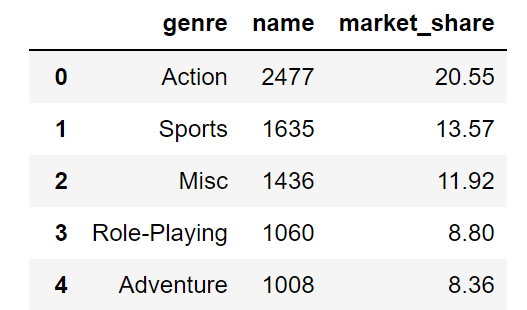

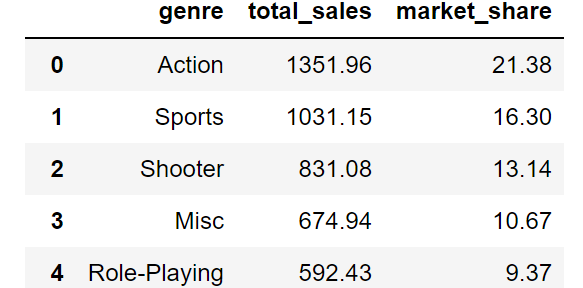

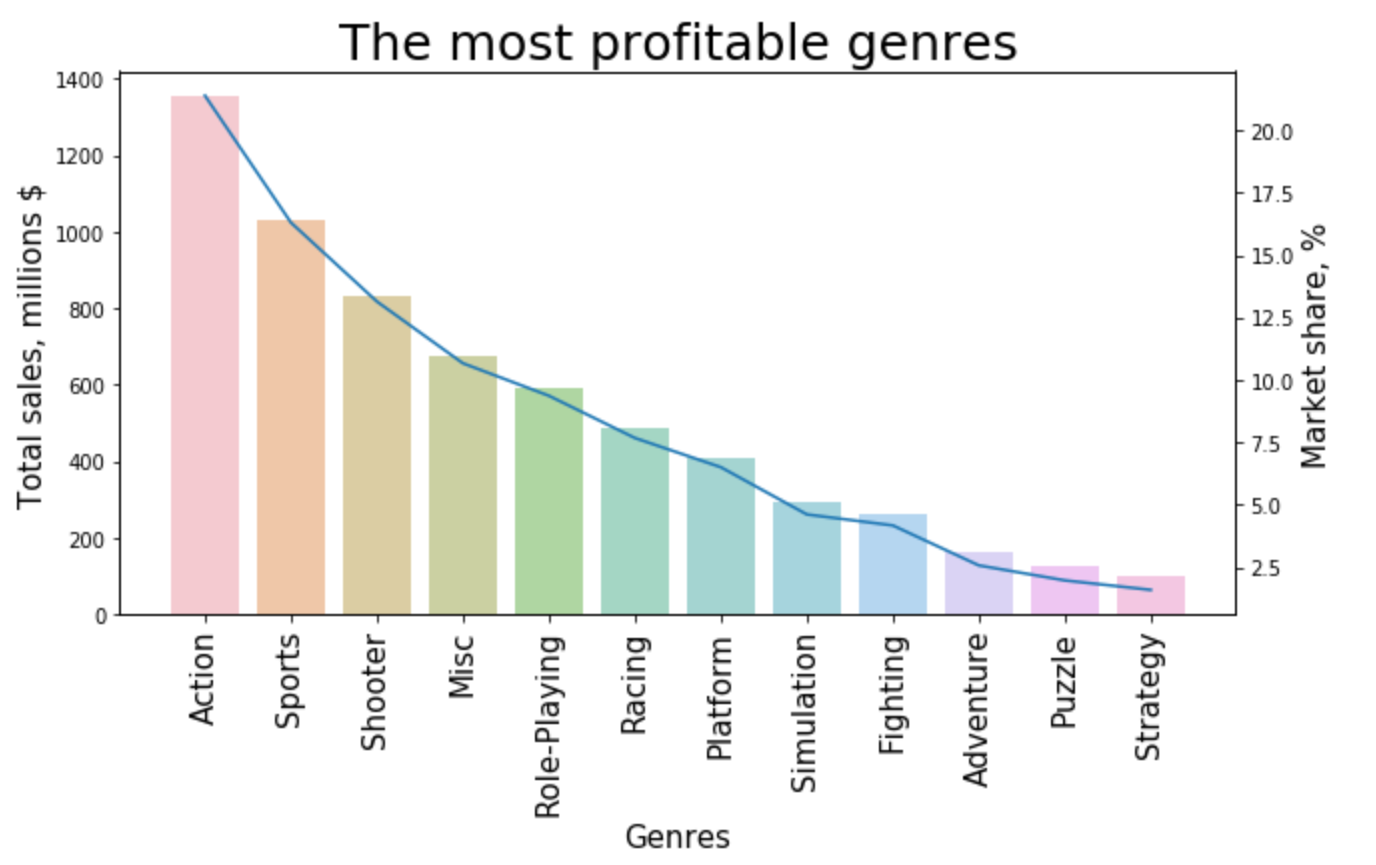

**Create a user profile for each region.**

For each region (NA, EU, JP), determined:
- The top five platforms. 
- The top five genres
- Found out how ESRB ratings affect sales in individual regions?

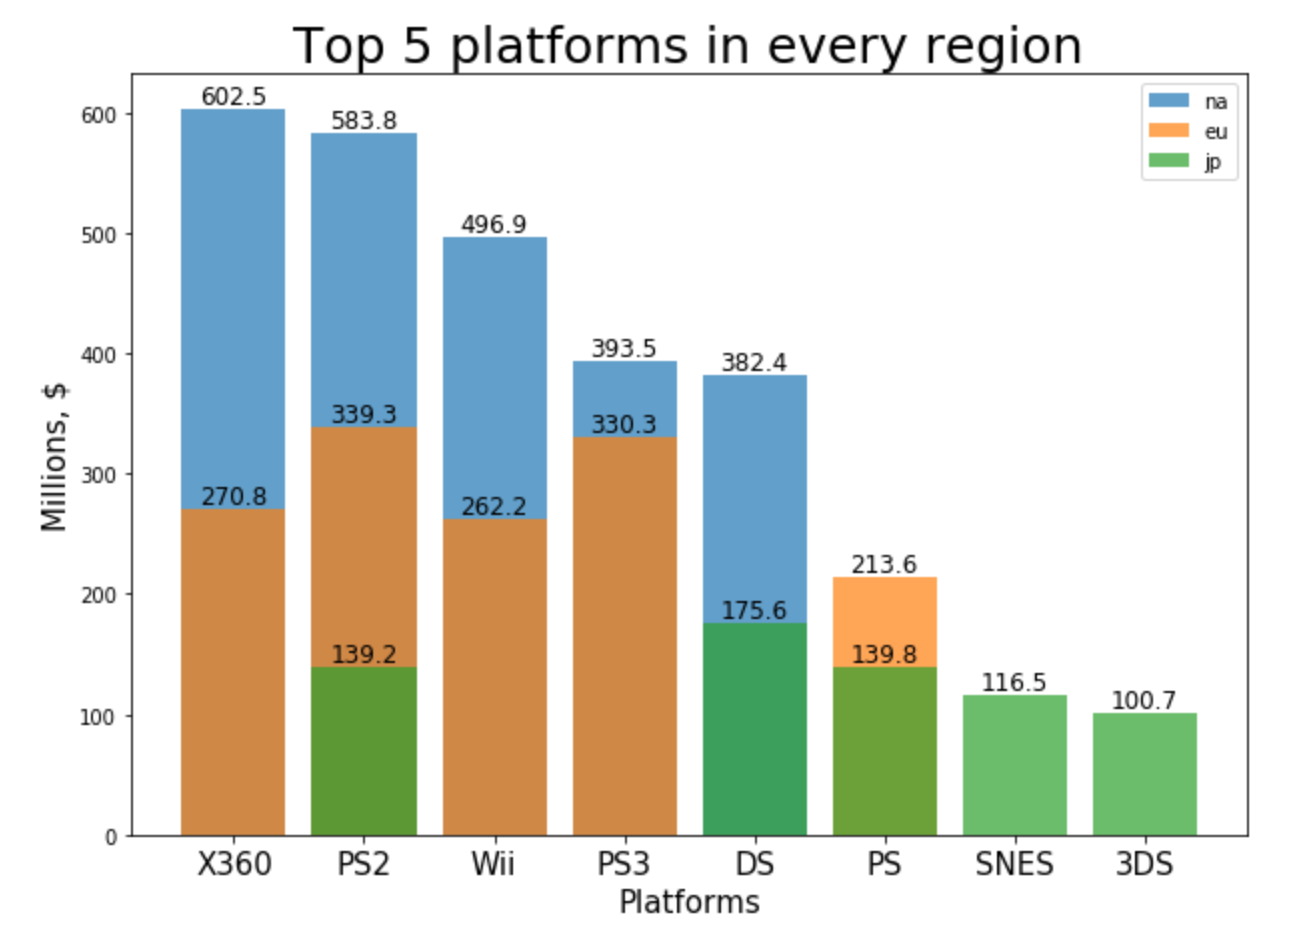

- We see that in North America users bought more games on: 
1. `X360` (602.5 millions, market share 13.69%, between 2005-2016)
2. `PS2` (583.8 millions, market share 13.26%, between 2000-2011)
3. `Wii` (496.9 millions, market share 11.29%, between 2006-2016)
4. `PS3` (393.5 millions, market share 8.94%, between 2006-2016)
5. `DS` (382.4 millions, market share 8.69%, between 2004-2013)

We see that the most successful generation of PS in every regions is `PS2`. In Japan even `PS`, but not the newest generation.

- In Europe users bought more games on: 
1. `PS2` (339.3 millions, market share 13.99%, between 2000-2011)
2. `PS3` (303.3 millions, market share 13.62%, between 2006-2016)
3. `X360` (270.8 millions, market share 11.17%, between 2005-2016)
4. `Wii` (262.2 millions, market share 10.81%, between 2006-2016)
5. `PS` (213.6 millions, market share 8.81%, between 1994-2003)

We see that none of the newest platforms didn't outsell the old version `PS` in Europe and since 2003 didn't removed it from fifth place.

- In Japan users bought more games on: 
1. `DS` (175.6 millions, market share 13.53%, between 2004-2013)
2. `PS` (139.8 millions, market share 10.78%, between 1994-2003)
3. `PS2` (139.2 millions, market share 10.73%, between 2000-2011) `
4. `SNES` (116.5 millions, market share 8.98%, between 1991-2002)
5. `3DS` (100.7 millions, market share 7.76%, between 2011-2016)

We see in the top - three platforms of Nintendo (Japanese company) that had games released from 1991 (`SNES`) and until nowadays (2016). Only `PS` and `PS2` had big success there.

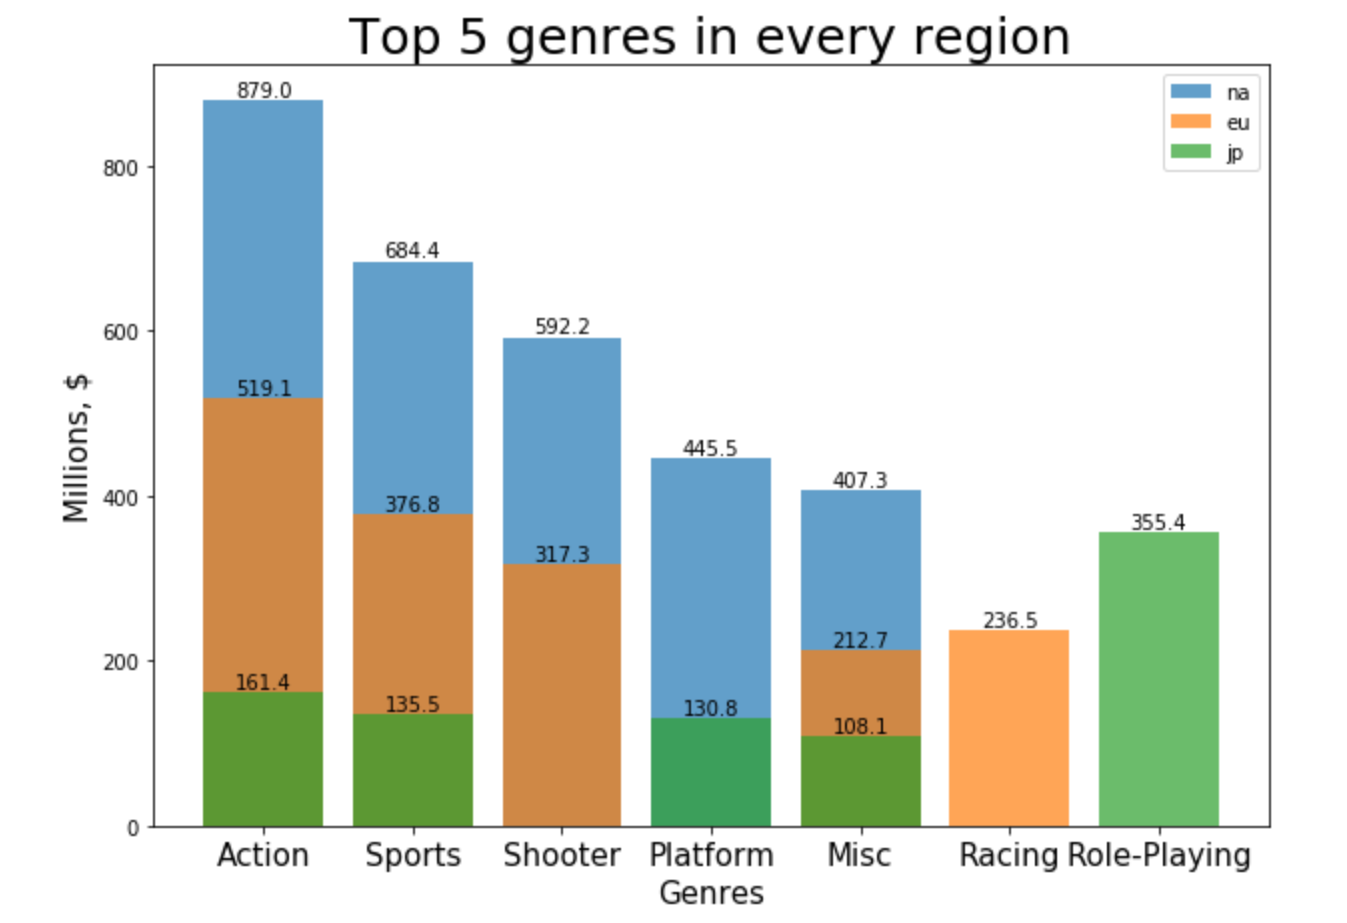

- We see that in North America users bought more games of such genres as: 
1. `Action` (879 millions, market share 19.97%)
2. `Sports` (684.4 millions, market share 15.55%)
3. `Shooter` (592.2 millions, market share 13.46%)
4. `Platform` (445.5 millions, market share 10.12%)
5. `Misc` (407.3 millions, market share 9.25%)

Users in NA the most like `Action`.

- We see that in Europe users bought more games of such genres as:
1. `Action` (519 millions, market share 21.42%)
2. `Sports` (376.8 millions, market share 15.54%)
3. `Shooter` (317 millions, market share 13.09%)
4. `Racing` (236.5 millions, market share 9.76%)
5. `Misc` (212.7 millions, market share 8.78%)

Users in EU have the same list of genres. Only instead of `Paltforms` they chose `Racing` on the fourth place.

- We see that in Japan users bought more games of such genres as:
1. `Role-Playing` (355.4 millions, market share 27.4%) 
2. `Action` (161.4 millions, market share 12.44%)
3. `Sports` (135.5 millions, market share 10.45%)
4. `Platform` (130.8 millions, market share 10.08%)
5. `Misc` (108.1 millions, market share8.33%)

Users in JP the most like `Role-Playing` games - over 27% of market. They don't like `Shooters` so much - it isn't in the top 5. Other genres in the list are the same genres as in NA. Now we know hwo played big part in getting `Role-Playing` genre into top 5 genres overall in the world by sales (got this information in 3.7.1 Conclusion).

We have leader in sales in every region - it's games for Everyone. Because they have more wide target group and studios create more games at all for Everyone (3993 games). Also games for `13+` and `17+` are popular because teenagers and adults can play it. And it's the major consumers of games. In Japan a lot of sales did games with unknown rating (64.9%), so we can't say exactly if our analysis is true. In Europe games with rating `17+` did more money than `13+` and in North America vice verse.

**Tested the hypotheses.**

**1. That the average user ratings of the Xbox One and PC platforms are the same.**

Formulated the **null hypothesis** that the average user scores for games on `XOne` and `PC` are the same, i.e. there's no difference between two populations.

Formulated the **alternative hypothesis** that there is significant difference between the average user scores for games on `XOne` and `PC`.

As result, we rejected the null hypothesis that the average user scores for `XOne` and `PC` are the same. The p-value told us that there is very small probability of randomly getting a difference that size or larger (i.e. it's very small probability that user scores are equel). So we can say that there is significant difference between the average user scores for `XOne` and `PC`.

**2. That the average user ratings for the Action and Sports genres are different.**

Formulated the **null hypothesis** that the average user scores for `Action` and `Sports` genres are the same, i.e. there's no difference between two populations.

Formulated the **alternative hypothesis** that there is significant difference between the average user scores for `Action` and `Sports` genres.

As result, we rejected the null hypothesis that the average user scores for `Action` and `Sports` genres are the same.  

The p-value told us that there is very small probability of randomly getting a difference that size. This probability is clearly too small to conclude that average user scores for `Action` and `Sports` genres are the same.

So, in other words, we can say that there is significant difference between the average user scores for `Action` and `Sports` genres.

### Final recommendation

Our final recommendation is to concentrate for advertising campaigns on games for `PS4` and `XOne` platforms, which have `Action`, `Sports` or `Shooter` genres and with ESRB rating `Everyone`.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Once again an outstanding research with correct interim findings, clean code and nice visualisation. I really like your overall conclusion. It is very structured, detailed and provides insights from your analysis.